# Data preprocessing

### Import necesary libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load datasets

In [5]:
# read data into dataframes
path = '/scratch/network/lg6248/housing-datasets/city-bedrooms-1.csv'
data1 = pd.read_csv(path)

path = '/scratch/network/lg6248/housing-datasets/city-bedrooms-2.csv'
data2 = pd.read_csv(path)

path = '/scratch/network/lg6248/housing-datasets/city-bedrooms-3.csv'
data3 = pd.read_csv(path)

path = '/scratch/network/lg6248/housing-datasets/city-bedrooms-4.csv'
data4 = pd.read_csv(path)

# see first 5 rows of data1
data1.head()

RegionID  SizeRank   RegionName RegionType StateName State  \
0      6181         0     New York       city        NY    NY   
1     12447         1  Los Angeles       city        CA    CA   
2     39051         2      Houston       city        TX    TX   
3     17426         3      Chicago       city        IL    IL   
4      6915         4  San Antonio       city        TX    TX   

                                   Metro          CountyName     2000-01-31  \
0  New York-Newark-Jersey City, NY-NJ-PA       Queens County  158704.158466   
1     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County  124525.689014   
2   Houston-The Woodlands-Sugar Land, TX       Harris County   79038.023611   
3     Chicago-Naperville-Elgin, IL-IN-WI         Cook County  104930.467136   
4          San Antonio-New Braunfels, TX        Bexar County   50468.797465   

      2000-02-29  ...     2023-04-30     2023-05-31     2023-06-30  \
0  159627.602378  ...  563395.738450  562560.108878  563150.294667   
1  124765.989261  ...  565277.239113  562992.636543  563082.006926   
2   79150.236449  ...  128288.469788  128346.488850  128427.107517   
3  105187.201148  ...  225079.943303  226997.089130  229001.403613   
4   50390.819317  ...  126147.786040  126518.976422  126979.901077   

      2023-07-31     2023-08-31     2023-09-30     2023-10-31     2023-11-30  \
0  563196.821095  562224.493483  560840.356244  558528.654771  555882.652895   
1  565771.268139  570699.533056  576687.878164  581029.153045  583514.091329   
2  128563.718031  128880.089708  129118.239601  129111.842249  129076.647762   
3  230806.586751  232672.381750  234500.171743  235846.669890  236724.692740   
4  127016.445252  126693.694318  126033.326919  125276.767997  124694.756015   

      2023-12-31     2024-01-31  
0  553607.742523  553988.087102  
1  583706.553188  580862.858026  
2  128828.256475  128750.268826  
3  236471.408045  236339.739420  
4  123921.481006  123208.099515  

[5 rows x 297 columns]

### Filter desired entries


In [6]:
# DATA 1: Select desired columns: county, state, time, price.
new_data1 = data1.iloc[:, [5, 7] + list(range(8, len(data1.columns)))]
new_data1.columns.values[0] = 'State'
new_data1.columns.values[1] = 'County'
new_data1

State                 County     2000-01-31     2000-02-29  \
0       NY          Queens County  158704.158466  159627.602378   
1       CA     Los Angeles County  124525.689014  124765.989261   
2       TX          Harris County   79038.023611   79150.236449   
3       IL            Cook County  104930.467136  105187.201148   
4       TX           Bexar County   50468.797465   50390.819317   
...    ...                    ...            ...            ...   
2690    ID        Kootenai County            NaN            NaN   
2691    CA  San Bernardino County   70433.837174   70167.044623   
2692    WV      Pocahontas County            NaN            NaN   
2693    CA        Tuolumne County            NaN            NaN   
2694    FL             Lee County            NaN            NaN   

         2000-03-31     2000-04-30     2000-05-31     2000-06-30  \
0     160582.215167  162562.606602  164649.892432  166987.782401   
1     125417.858945  126747.050301  128395.315512  130042.166660   
2      79518.497454   79119.739690   78429.908642   77385.356604   
3     105712.360772  106852.847606  108301.245636  109827.613728   
4      50441.428234   50439.164296   50202.713007   49791.418837   
...             ...            ...            ...            ...   
2690            NaN            NaN            NaN            NaN   
2691   70075.567914   70051.599733   70529.790277   71037.585594   
2692            NaN            NaN            NaN            NaN   
2693            NaN            NaN            NaN            NaN   
2694            NaN            NaN            NaN            NaN   

         2000-07-31     2000-08-31  ...     2023-04-30     2023-05-31  \
0     169269.296933  171432.151214  ...  563395.738450  562560.108878   
1     131713.328418  133323.693062  ...  565277.239113  562992.636543   
2      77732.215966   77812.734151  ...  128288.469788  128346.488850   
3     111360.492232  113032.008597  ...  225079.943303  226997.089130   
4      49399.317928   49322.343922  ...  126147.786040  126518.976422   
...             ...            ...  ...            ...            ...   
2690            NaN            NaN  ...  272737.172427  272036.445123   
2691   71246.927770   71008.192335  ...  269505.273646  267792.491680   
2692            NaN            NaN  ...  133601.020706  138660.269195   
2693            NaN            NaN  ...  231485.602195  231825.799781   
2694            NaN            NaN  ...  606149.374448  597216.194064   

         2023-06-30     2023-07-31     2023-08-31     2023-09-30  \
0     563150.294667  563196.821095  562224.493483  560840.356244   
1     563082.006926  565771.268139  570699.533056  576687.878164   
2     128427.107517  128563.718031  128880.089708  129118.239601   
3     229001.403613  230806.586751  232672.381750  234500.171743   
4     126979.901077  127016.445252  126693.694318  126033.326919   
...             ...            ...            ...            ...   
2690  273889.707810  275451.585657  277216.621342  277681.157549   
2691  267498.920288  267878.732864  268731.972277  269418.482720   
2692  143300.046460  146078.025818  147436.577328  147249.015680   
2693  231384.830781  229675.041899  228335.505338  227618.954821   
2694  594487.868348  591545.903749  587586.983955  579458.853460   

         2023-10-31     2023-11-30     2023-12-31     2024-01-31  
0     558528.654771  555882.652895  553607.742523  553988.087102  
1     581029.153045  583514.091329  583706.553188  580862.858026  
2     129111.842249  129076.647762  128828.256475  128750.268826  
3     235846.669890  236724.692740  236471.408045  236339.739420  
4     125276.767997  124694.756015  123921.481006  123208.099515  
...             ...            ...            ...            ...  
2690  278118.737752  277155.684436  275616.850398  274318.366963  
2691  269872.590751  269891.821395  270673.069346  269424.502653  
2692  146998.818385  147172.261076  148193.990648  150666.075528  
2693  227507.069475

In [7]:
# DATA 2: Select desired columns
new_data2 = data2.iloc[:, [5, 7] + list(range(8, len(data2.columns)))]
new_data2.columns.values[0] = 'State'
new_data2.columns.values[1] = 'County'
new_data2.head()

State              County     2000-01-31     2000-02-29     2000-03-31  \
0    NY       Queens County  257453.589487  258850.859324  260232.846601   
1    CA  Los Angeles County  173730.699987  174003.509350  174778.869185   
2    TX       Harris County   71639.636265   71594.365236   71446.291068   
3    IL         Cook County  105567.712081  105623.725820  105924.592425   
4    TX        Bexar County   57472.292098   57522.376035   57582.490756   

      2000-04-30     2000-05-31     2000-06-30     2000-07-31     2000-08-31  \
0  262922.615825  265651.665697  268684.176409  271904.855123  274906.141304   
1  176307.664341  178233.823467  180122.965700  182082.178314  184080.802356   
2   71140.944102   70723.935814   70441.099644   70482.738722   70640.377189   
3  106672.074719  107608.433393  108632.836259  109560.057110  110698.894908   
4   57662.120582   57465.283948   57164.050970   56821.127476   56739.930269   

   ...     2023-04-30     2023-05-31     2023-06-30     2023-07-31  \
0  ...  711627.813215  713556.194758  716930.244661  719114.124652   
1  ...  720057.482313  719337.746959  722671.954570  730303.419309   
2  ...  180261.214698  180626.010824  181164.691046  181438.673376   
3  ...  269859.181735  272307.691648  274614.930078  276827.288390   
4  ...  158941.036870  159000.994491  159359.744895  159213.377641   

      2023-08-31     2023-09-30     2023-10-31     2023-11-30     2023-12-31  \
0  718271.109250  715424.498199  710809.996787  707171.484880  704512.540276   
1  741068.972563  752369.057819  761723.775114  768294.570286  772040.999863   
2  181668.655257  181555.753899  181521.978793  181487.085083  181411.495391   
3  279313.974137  281526.961030  283115.245032  284058.784423  284127.045780   
4  158596.939188  157473.810571  156402.010253  155395.288094  154275.730659   

      2024-01-31  
0  705268.358420  
1  769585.470555  
2  181561.978955  
3  284137.145151  
4  153246.963456  

[5 rows x 291 columns]

In [8]:
# DATA 3: Select desired columns
new_data3 = data3.iloc[:, [5, 7] + list(range(8, len(data3.columns)))]
new_data3.columns.values[0] = 'State'
new_data3.columns.values[1] = 'County'
new_data3.head()

State              County     2000-01-31     2000-02-29     2000-03-31  \
0    NY       Queens County  240780.803980  242057.576162  243353.141542   
1    CA  Los Angeles County  215684.031455  215977.075585  216922.936256   
2    TX       Harris County   91165.061560   91164.382319   91058.439953   
3    IL         Cook County  122337.835824  122321.967871  122565.250471   
4    TX        Bexar County   87998.073808   88086.373292   88137.803574   

      2000-04-30     2000-05-31     2000-06-30     2000-07-31     2000-08-31  \
0  245869.929318  248443.422243  251222.216907  254130.851501  256806.775122   
1  218798.401886  221162.355119  223450.361701  225773.116815  228161.870560   
2   91066.491866   91094.986350   91279.676747   91458.316853   91737.965040   
3  123236.749512  124141.292258  125125.151124  126030.128168  127156.681324   
4   88241.197188   87846.279349   87314.615188   86731.617957   86625.648569   

   ...     2023-04-30     2023-05-31     2023-06-30     2023-07-31  \
0  ...  750519.376161  753219.590097  756907.858629  758935.887216   
1  ...  855985.479043  857050.268583  863490.998514  875150.025935   
2  ...  242999.680247  243348.691963  244223.501874  245120.939395   
3  ...  287626.243180  289183.363619  290829.744559  292632.623979   
4  ...  241517.479598  241365.781823  241697.652549  241902.976607   

      2023-08-31     2023-09-30     2023-10-31     2023-11-30     2023-12-31  \
0  758805.315006  756723.540359  754252.868781  752343.614176  751285.265903   
1  890593.380967  906190.112593  919263.760968  928142.580512  933200.661373   
2  246042.118877  246530.252328  246770.558717  246701.588133  246619.341350   
3  294684.848753  296158.551485  296979.277602  297304.386662  297378.547895   
4  242035.141816  241647.811758  240909.256318  239709.025898  238273.912081   

      2024-01-31  
0  751391.105761  
1  930367.542471  
2  246985.150985  
3  297569.975313  
4  237241.995938  

[5 rows x 291 columns]

In [9]:
# DATA 4: Select desired columns
new_data4 = data4.iloc[:, [5, 7] + list(range(8, len(data4.columns)))]
new_data4.columns.values[0] = 'State'
new_data4.columns.values[1] = 'County'
new_data4.head()

State              County     2000-01-31     2000-02-29     2000-03-31  \
0    NY       Queens County  276038.684169  277584.838866  279059.948317   
1    CA  Los Angeles County  279258.606782  279691.721122  280860.980250   
2    TX       Harris County  139805.795714  139706.928643  139449.576429   
3    IL         Cook County  158561.216064  158640.488508  159038.536808   
4    TX        Bexar County  142345.578736  142546.743724  142745.951469   

      2000-04-30     2000-05-31     2000-06-30     2000-07-31     2000-08-31  \
0  281953.303519  284824.974722  287920.281005  291108.129957  294022.104101   
1  283282.750720  286265.540171  289176.486683  292054.236250  295077.349899   
2  139350.963674  139329.748696  139551.949448  139652.719698  139850.459858   
3  160063.708228  161276.831963  162533.763589  163684.250619  165285.302464   
4  143136.072902  142602.226645  141706.511743  140678.549460  140508.920162   

   ...    2023-04-30    2023-05-31    2023-06-30    2023-07-31    2023-08-31  \
0  ...  9.024223e+05  9.031067e+05  9.052907e+05  9.058523e+05  9.042579e+05   
1  ...  1.072558e+06  1.073673e+06  1.081779e+06  1.097041e+06  1.117744e+06   
2  ...  3.184788e+05  3.184507e+05  3.191956e+05  3.202093e+05  3.212595e+05   
3  ...  3.588717e+05  3.595655e+05  3.606034e+05  3.620456e+05  3.637091e+05   
4  ...  3.392684e+05  3.391403e+05  3.395487e+05  3.398614e+05  3.399205e+05   

     2023-09-30    2023-10-31    2023-11-30    2023-12-31    2024-01-31  
0  9.001437e+05  8.959606e+05  8.926963e+05  8.910582e+05  8.912282e+05  
1  1.138650e+06  1.155414e+06  1.166334e+06  1.172230e+06  1.168613e+06  
2  3.217644e+05  3.219334e+05  3.217271e+05  3.214459e+05  3.215263e+05  
3  3.646243e+05  3.649166e+05  3.649347e+05  3.650096e+05  3.654548e+05  
4  3.391391e+05  3.379249e+05  3.363352e+05  3.346046e+05  3.331856e+05  

[5 rows x 291 columns]

### Include time and price as two separate columns for each dataset

In [10]:
# DATA 1
# reshape dataframe to include time as row entries along with their correspoding price
data1 = new_data1.melt(id_vars = ['State', 'County'], var_name= 'Time', value_name= 'Price')
print(data1.head(), "\n")
print("rows: ", len(data1))

  State              County        Time          Price
0    NY       Queens County  2000-01-31  158704.158466
1    CA  Los Angeles County  2000-01-31  124525.689014
2    TX       Harris County  2000-01-31   79038.023611
3    IL         Cook County  2000-01-31  104930.467136
4    TX        Bexar County  2000-01-31   50468.797465 

rows:  778855


In [11]:
# DATA 2
# reshape dataframe to include time as row entries along with their correspoding price
data2 = new_data2.melt(id_vars = ['State', 'County'], var_name= 'Time', value_name= 'Price')
print(data2.head(), "\n")
print("rows: ", len(data2))

  State              County        Time          Price
0    NY       Queens County  2000-01-31  257453.589487
1    CA  Los Angeles County  2000-01-31  173730.699987
2    TX       Harris County  2000-01-31   71639.636265
3    IL         Cook County  2000-01-31  105567.712081
4    TX        Bexar County  2000-01-31   57472.292098 

rows:  3269457


In [12]:
# DATA 3
# reshape dataframe to include time as row entries along with their correspoding price
data3 = new_data3.melt(id_vars = ['State', 'County'], var_name= 'Time', value_name= 'Price')
print(data3.head(), "\n")
print("rows: ", len(data3))

  State              County        Time          Price
0    NY       Queens County  2000-01-31  240780.803980
1    CA  Los Angeles County  2000-01-31  215684.031455
2    TX       Harris County  2000-01-31   91165.061560
3    IL         Cook County  2000-01-31  122337.835824
4    TX        Bexar County  2000-01-31   87998.073808 

rows:  4557241


In [13]:
# DATA 4
# reshape dataframe to include time as row entries along with their correspoding price
data4 = new_data4.melt(id_vars = ['State', 'County'], var_name= 'Time', value_name= 'Price')
print(data4.head(), "\n")
print("rows: ", len(data4))

  State              County        Time          Price
0    NY       Queens County  2000-01-31  276038.684169
1    CA  Los Angeles County  2000-01-31  279258.606782
2    TX       Harris County  2000-01-31  139805.795714
3    IL         Cook County  2000-01-31  158561.216064
4    TX        Bexar County  2000-01-31  142345.578736 

rows:  3128425


### Include # of bedrooms as feature

In [14]:
# DATA 1
data1['Bedrooms'] = 1
data1.head(8)

State               County        Time          Price  Bedrooms
0    NY        Queens County  2000-01-31  158704.158466         1
1    CA   Los Angeles County  2000-01-31  124525.689014         1
2    TX        Harris County  2000-01-31   79038.023611         1
3    IL          Cook County  2000-01-31  104930.467136         1
4    TX         Bexar County  2000-01-31   50468.797465         1
5    PA  Philadelphia County  2000-01-31   71554.783685         1
6    AZ      Maricopa County  2000-01-31   63112.584315         1
7    NV         Clark County  2000-01-31   96037.661209         1

In [15]:
# DATA 2
data2['Bedrooms'] = 2
data2.head()

State              County        Time          Price  Bedrooms
0    NY       Queens County  2000-01-31  257453.589487         2
1    CA  Los Angeles County  2000-01-31  173730.699987         2
2    TX       Harris County  2000-01-31   71639.636265         2
3    IL         Cook County  2000-01-31  105567.712081         2
4    TX        Bexar County  2000-01-31   57472.292098         2

In [16]:
# DATA 3
data3['Bedrooms'] = 3
data3.head()

State              County        Time          Price  Bedrooms
0    NY       Queens County  2000-01-31  240780.803980         3
1    CA  Los Angeles County  2000-01-31  215684.031455         3
2    TX       Harris County  2000-01-31   91165.061560         3
3    IL         Cook County  2000-01-31  122337.835824         3
4    TX        Bexar County  2000-01-31   87998.073808         3

In [17]:
# DATA 4
data4['Bedrooms'] = 4
data4.head()

State              County        Time          Price  Bedrooms
0    NY       Queens County  2000-01-31  276038.684169         4
1    CA  Los Angeles County  2000-01-31  279258.606782         4
2    TX       Harris County  2000-01-31  139805.795714         4
3    IL         Cook County  2000-01-31  158561.216064         4
4    TX        Bexar County  2000-01-31  142345.578736         4

### Combine datasets, replace time with Year, and handle missing entries

In [18]:
# Combine 4 datasets into 1 dataframe (append data vertically to columns) -- should have 11733978 rows (verified).
# concat preserves order of data.
data = pd.concat([data1, data2, data3, data4], ignore_index = True)
print(data)

         State              County        Time          Price  Bedrooms
0           NY       Queens County  2000-01-31  158704.158466         1
1           CA  Los Angeles County  2000-01-31  124525.689014         1
2           TX       Harris County  2000-01-31   79038.023611         1
3           IL         Cook County  2000-01-31  104930.467136         1
4           TX        Bexar County  2000-01-31   50468.797465         1
...        ...                 ...         ...            ...       ...
11733973    IA          Lee County  2024-01-31  160715.210299         4
11733974    IA   Winneshiek County  2024-01-31  183866.456173         4
11733975    OH         Wood County  2024-01-31  314363.959454         4
11733976    IA      Clayton County  2024-01-31  138822.604773         4
11733977    KS       Barton County  2024-01-31  128385.751254         4

[11733978 rows x 5 columns]


In [20]:
# Convert the date column to datetime dtype
data['Time'] = pd.to_datetime(data['Time'])

data.dtypes

State               object
County              object
Time        datetime64[ns]
Price              float64
Bedrooms             int64
dtype: object

In [21]:
# Create year and month features.
data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.month

# Convert the year column to dtype int64
data['Year'] = data['Year'].astype('int64')

In [22]:
print(data)

         State              County       Time          Price  Bedrooms  Year  \
0           NY       Queens County 2000-01-31  158704.158466         1  2000   
1           CA  Los Angeles County 2000-01-31  124525.689014         1  2000   
2           TX       Harris County 2000-01-31   79038.023611         1  2000   
3           IL         Cook County 2000-01-31  104930.467136         1  2000   
4           TX        Bexar County 2000-01-31   50468.797465         1  2000   
...        ...                 ...        ...            ...       ...   ...   
11733973    IA          Lee County 2024-01-31  160715.210299         4  2024   
11733974    IA   Winneshiek County 2024-01-31  183866.456173         4  2024   
11733975    OH         Wood County 2024-01-31  314363.959454         4  2024   
11733976    IA      Clayton County 2024-01-31  138822.604773         4  2024   
11733977    KS       Barton County 2024-01-31  128385.751254         4  2024   

          Month  
0             1  
1  

In [23]:
# verify that year and month is of type int
print(data['Year'].dtype)
print(data['Month'].dtype)

int64
int32


In [24]:
# rearrange columns, such that target 'Price' is first.
columns = list(data.columns)
columns.remove('Price')
new_order = ['Price'] + columns
data = data[new_order]
data.head()

Price State              County       Time  Bedrooms  Year  Month
0  158704.158466    NY       Queens County 2000-01-31         1  2000      1
1  124525.689014    CA  Los Angeles County 2000-01-31         1  2000      1
2   79038.023611    TX       Harris County 2000-01-31         1  2000      1
3  104930.467136    IL         Cook County 2000-01-31         1  2000      1
4   50468.797465    TX        Bexar County 2000-01-31         1  2000      1

In [25]:
# inspect null values in columns of dataframe
nullCount = data.isnull().sum()
nullCount

Price       3368445
State             0
County            0
Time              0
Bedrooms          0
Year              0
Month             0
dtype: int64

In [26]:
# Drop rows with missing home values
data = data.dropna(subset=['Price'])

# Verify that there are no null values in df
nullCount = data.isnull().sum()
nullCount

Price       0
State       0
County      0
Time        0
Bedrooms    0
Year        0
Month       0
dtype: int64

## Load combined dataset

In [27]:
# data.to_csv('combined_housing_data', index = False)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
data = pd.read_csv('combined_housing_data')
data

Price State              County        Time  Bedrooms  Year  \
0        158704.158466    NY       Queens County  2000-01-31         1  2000   
1        124525.689014    CA  Los Angeles County  2000-01-31         1  2000   
2         79038.023611    TX       Harris County  2000-01-31         1  2000   
3        104930.467136    IL         Cook County  2000-01-31         1  2000   
4         50468.797465    TX        Bexar County  2000-01-31         1  2000   
...                ...   ...                 ...         ...       ...   ...   
8365528  160715.210299    IA          Lee County  2024-01-31         4  2024   
8365529  183866.456173    IA   Winneshiek County  2024-01-31         4  2024   
8365530  314363.959454    OH         Wood County  2024-01-31         4  2024   
8365531  138822.604773    IA      Clayton County  2024-01-31         4  2024   
8365532  128385.751254    KS       Barton County  2024-01-31         4  2024   

         Month  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
8365528      1  
8365529      1  
8365530      1  
8365531      1  
8365532      1  

[8365533 rows x 7 columns]

## Limit data up to 2022 (to align with loan model) and sort by Time

In [4]:
data = data[data['Year'] <= 2022]
data = data.sort_values(by='Time') # Sort the DataFrame by 'Time' column
data.reset_index(drop = True, inplace = True)
data

Price State             County        Time  Bedrooms  Year  \
0        158704.158466    NY      Queens County  2000-01-31         1  2000   
1         76304.982749    CA      Fresno County  2000-01-31         3  2000   
2        158349.982628    NJ  Burlington County  2000-01-31         3  2000   
3        161013.360497    FL     Brevard County  2000-01-31         3  2000   
4        133867.364686    MI      Ottawa County  2000-01-31         3  2000   
...                ...   ...                ...         ...       ...   ...   
7854408  225682.257376    VT  Washington County  2022-12-31         2  2022   
7854409   93297.535034    OH    Crawford County  2022-12-31         2  2022   
7854410  149790.951454    OK       Grady County  2022-12-31         2  2022   
7854411  379267.052269    MN       Anoka County  2022-12-31         2  2022   
7854412  119779.800812    KS      Barton County  2022-12-31         4  2022   

         Month  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
7854408     12  
7854409     12  
7854410     12  
7854411     12  
7854412     12  

[7854413 rows x 7 columns]

### Function: plot_train_test_split

In [24]:
# Graph of Price vs. Year with Train/Test splits, up to year 2018.
def plot_train_test_split(frame, validation_years):
    fig, axs = plt.subplots(5, 1, figsize = (15, 15), sharex = True)
    
    train_indices = []
    test_indices = []
    
    fold = 0
    # Create train-test splits 
    for val_year in validation_years:
        # Define the training data as all years before the validation year
        train = frame[frame['Year'] < val_year]
        
        # Define the test data as the validation year
        test = frame[frame['Year'] == val_year]
        
        train.plot(x='Time', y='Price', ax=axs[fold], label='Training Set',
                   title=f"Data Train/Test Split Fold {fold}")
        test.plot(x='Time', y='Price', ax=axs[fold], label='Test Set')
        
        axs[fold].axvline(test.Time.min(), color = "black", ls = '--')
        fold += 1
    plt.show()

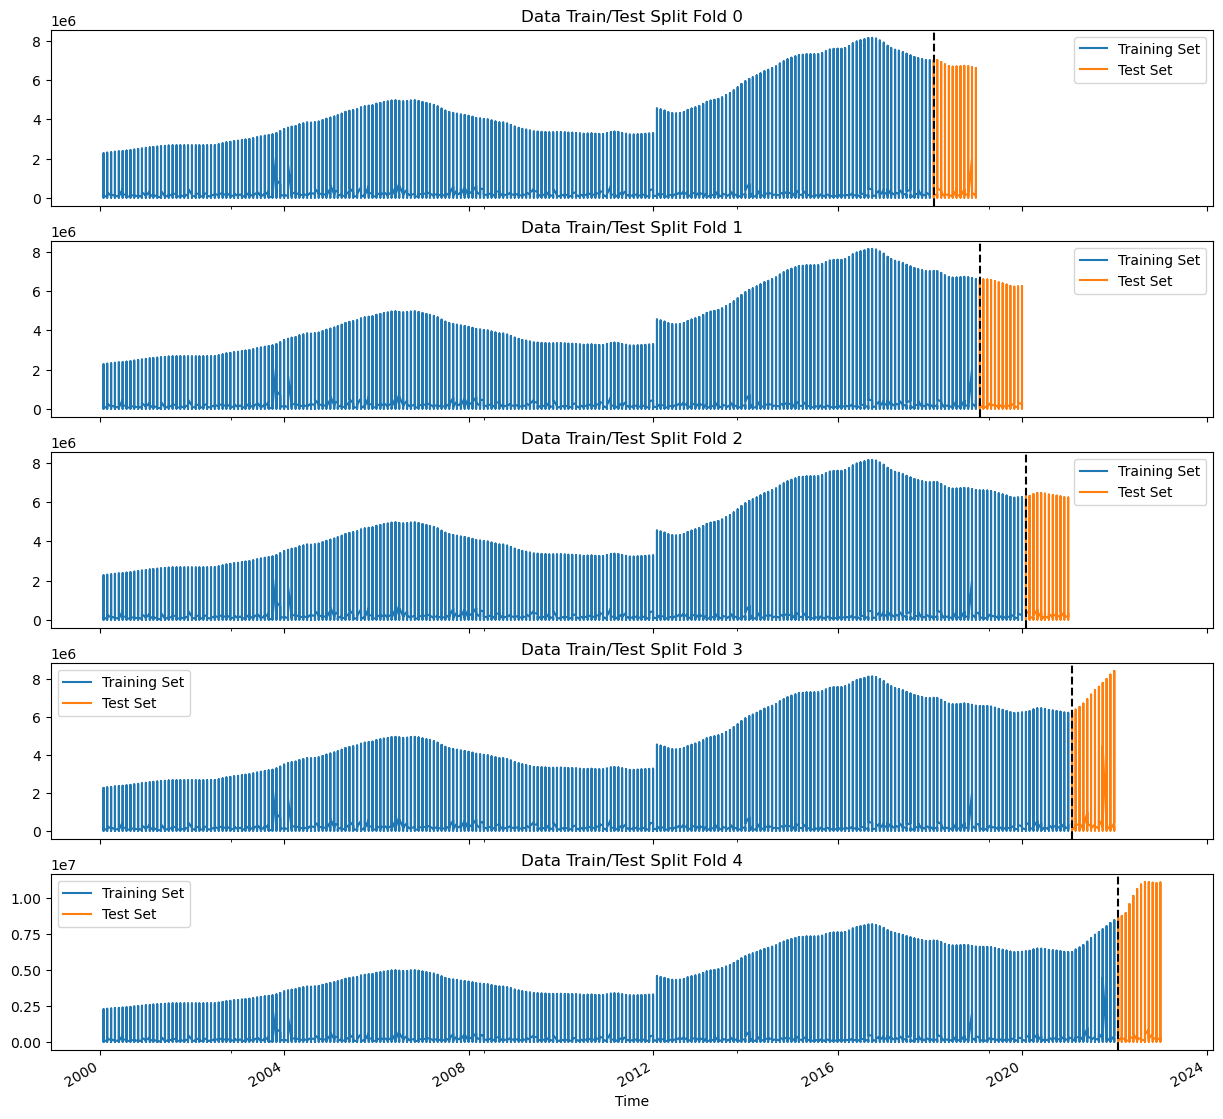

In [25]:
validation_years = [2018, 2019, 2020, 2021, 2022]
plot_train_test_split(data, validation_years)

## Set threshold for housing price

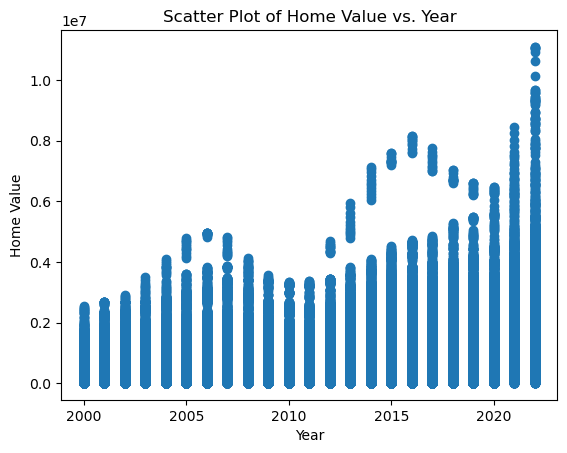

In [33]:
# Note there are outliers (higher prices than most of the data)
plt.scatter(data['Year'], data['Price'])
plt.xlabel('Year')
plt.ylabel('Home Value')
plt.title('Scatter Plot of Home Value vs. Year')
plt.show()

In [27]:
# summary statistics of price in dataset
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(data['Price'].describe())

count    7854413.000
mean      224255.733
std       212619.250
min         7725.841
25%       112148.109
50%       170062.457
75%       266723.829
max     11096080.025
Name: Price, dtype: float64


### Limit home value to 1 million USD

In [5]:
# limit home value/price up to $1 million USD
df2 = data[data['Price'] <= 1000000]

# Print the filtered DataFrame with price threshold set above
print(df2)

                 Price State             County        Time  Bedrooms  Year  \
0        158704.158466    NY      Queens County  2000-01-31         1  2000   
1         76304.982749    CA      Fresno County  2000-01-31         3  2000   
2        158349.982628    NJ  Burlington County  2000-01-31         3  2000   
3        161013.360497    FL     Brevard County  2000-01-31         3  2000   
4        133867.364686    MI      Ottawa County  2000-01-31         3  2000   
...                ...   ...                ...         ...       ...   ...   
7854408  225682.257376    VT  Washington County  2022-12-31         2  2022   
7854409   93297.535034    OH    Crawford County  2022-12-31         2  2022   
7854410  149790.951454    OK       Grady County  2022-12-31         2  2022   
7854411  379267.052269    MN       Anoka County  2022-12-31         2  2022   
7854412  119779.800812    KS      Barton County  2022-12-31         4  2022   

         Month  
0            1  
1            1  


In [29]:
# summary statistics of price in dataset
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(df2['Price'].describe())

count   7776276.000
mean     210761.563
std      148202.630
min        7725.841
25%      111597.707
50%      168738.942
75%      262413.763
max      999999.268
Name: Price, dtype: float64


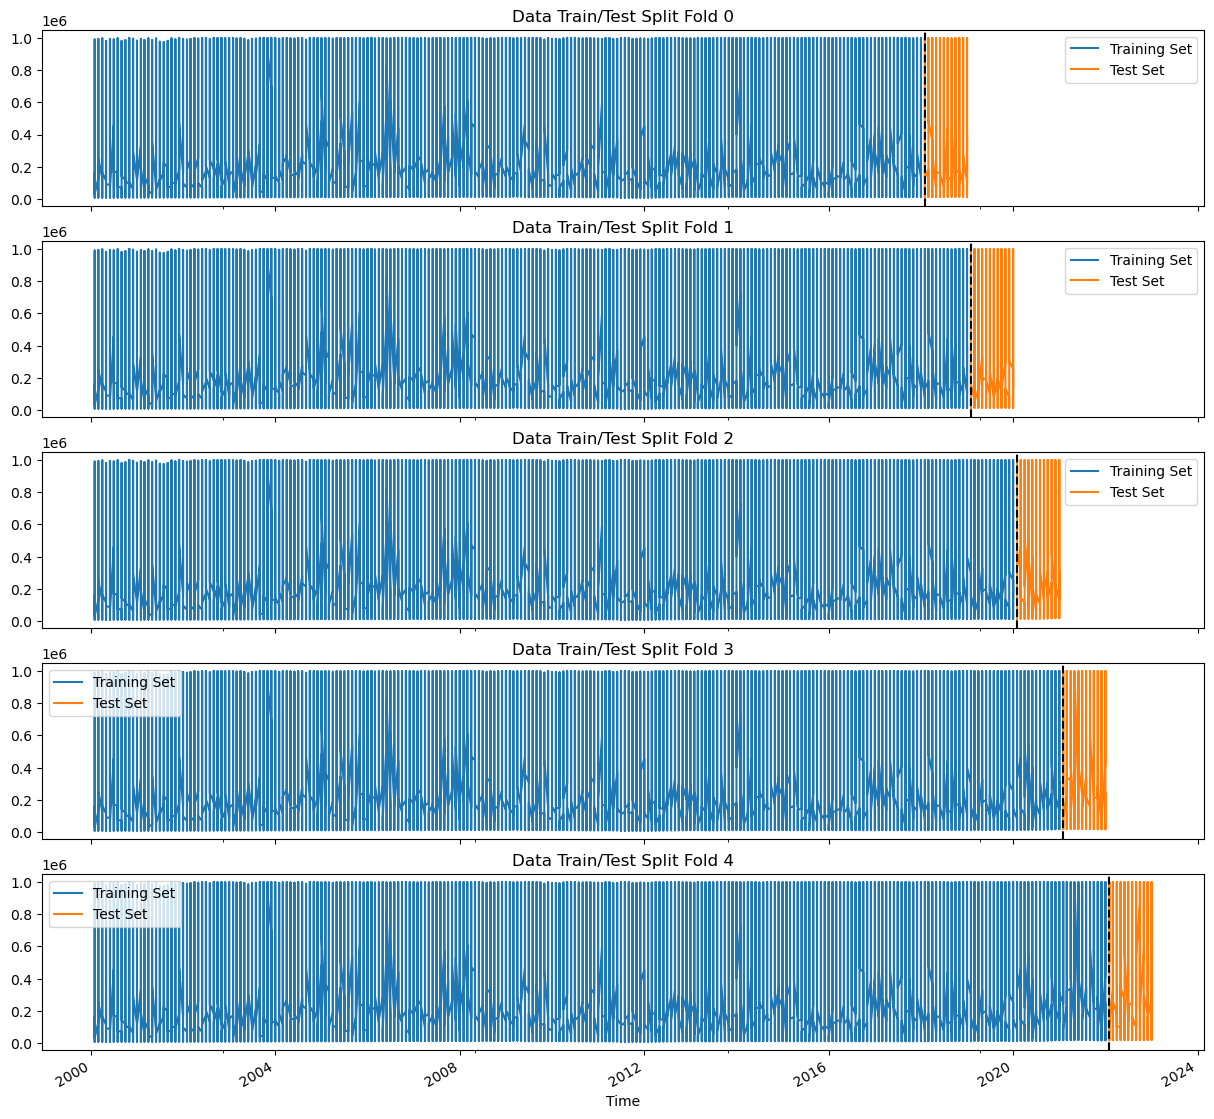

In [30]:
plot_train_test_split(df2, validation_years)

## Investigate relationships between variables

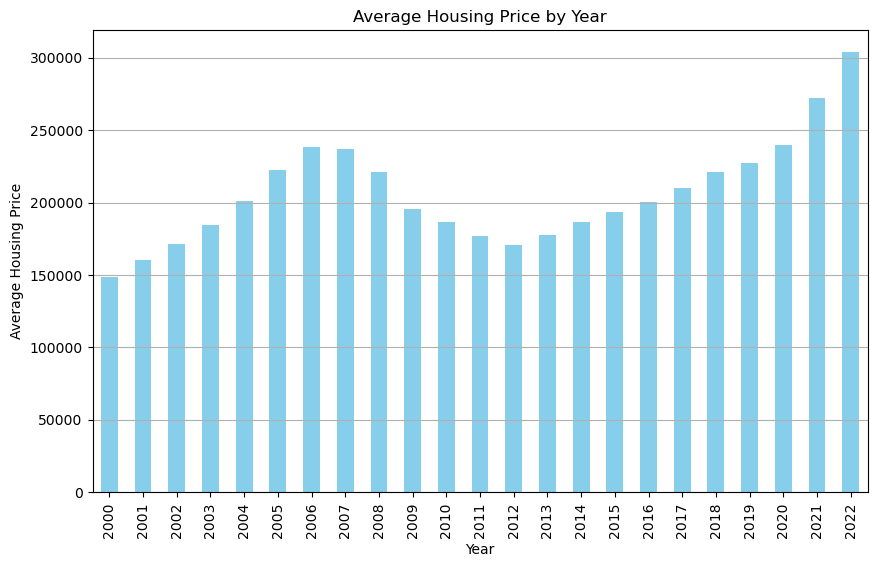

In [6]:
# Create bar plot of average housing price per state.
plt.figure(figsize=(10, 6))
average_prices = df2.groupby('Year')['Price'].mean()
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Housing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

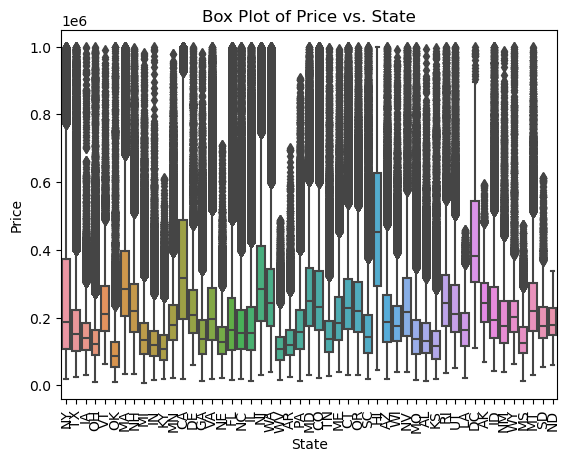

<Figure size 2000x600 with 0 Axes>

In [32]:
# Box plot of price vs. state
sns.boxplot(x='State', y='Price', data=df2)
plt.xticks(rotation= 90)
plt.xlabel('State')
plt.ylabel('Price')
plt.title('Box Plot of Price vs. State')
plt.figure(figsize=(20, 6))
plt.show()

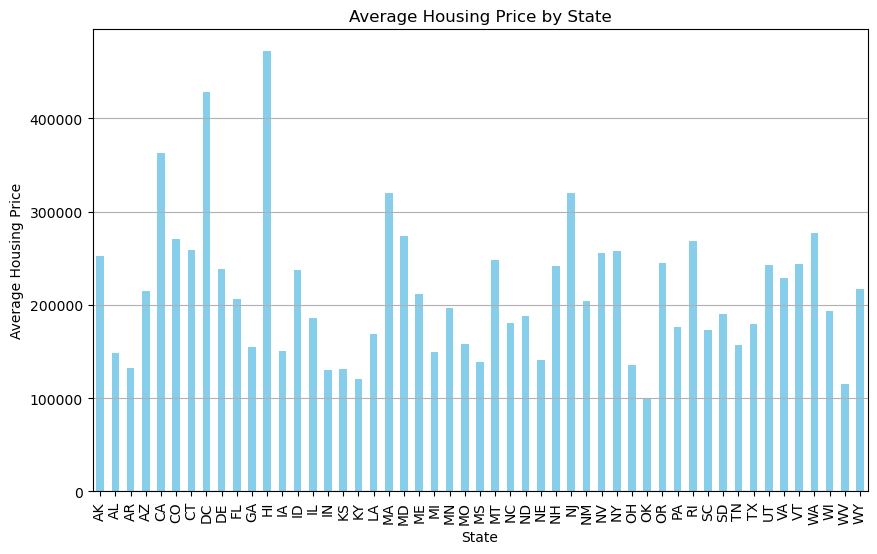

In [33]:
# Create bar plot of average housing price per state.
plt.figure(figsize=(10, 6))
average_prices = df2.groupby('State')['Price'].mean()
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Housing Price by State')
plt.xlabel('State')
plt.ylabel('Average Housing Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

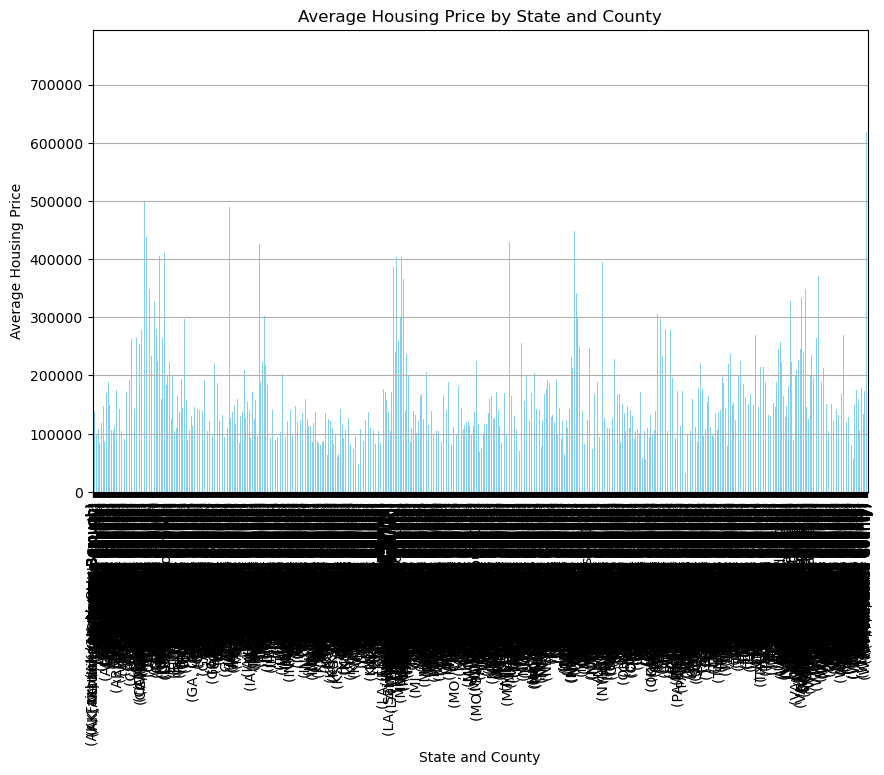

In [7]:
# Create bar plot of average housing price per state and county.
plt.figure(figsize=(10, 6))
average_prices = df2.groupby(['State', 'County'])['Price'].mean()
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Housing Price by State and County')
plt.xlabel('State and County')
plt.ylabel('Average Housing Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

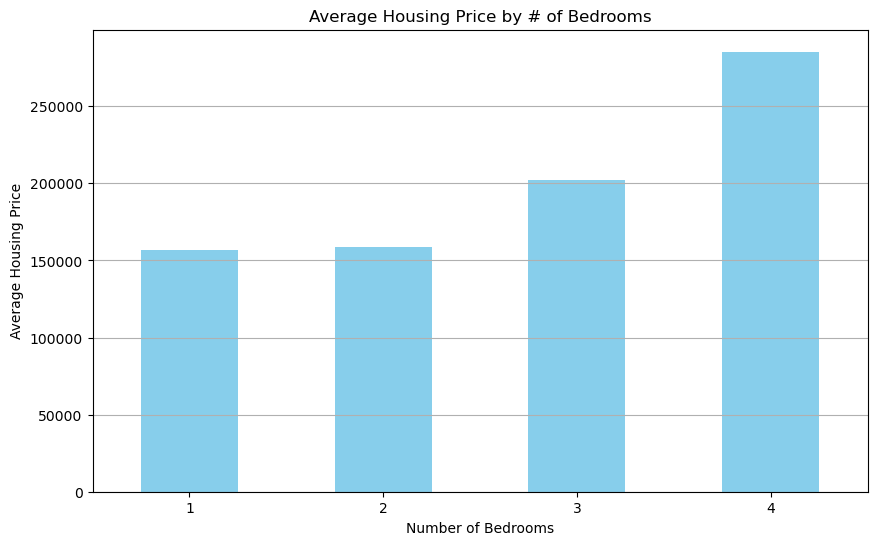

In [35]:
# Create bar plot of average housing price according to # of bedrooms.
plt.figure(figsize=(10, 6))
average_prices = df2.groupby('Bedrooms')['Price'].mean()
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Housing Price by # of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Housing Price')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

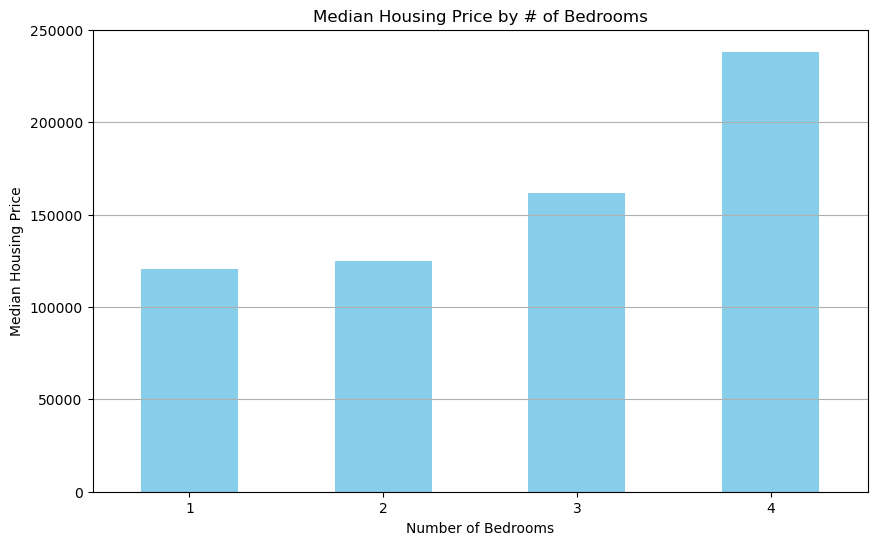

In [36]:
# Create bar plot of median housing price according to # of bedrooms.
plt.figure(figsize=(10, 6))
average_prices = df2.groupby('Bedrooms')['Price'].median()
average_prices.plot(kind='bar', color='skyblue')
plt.title('Median Housing Price by # of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Housing Price')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

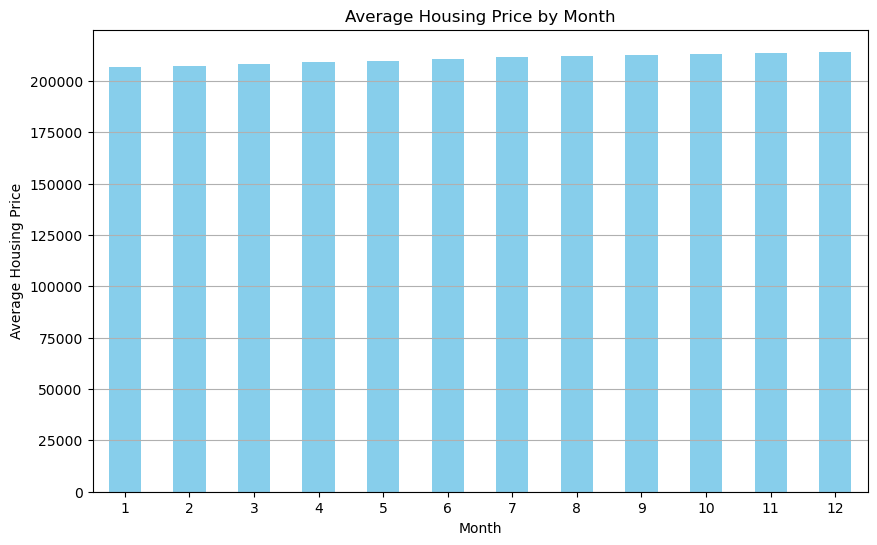

In [8]:
# Create bar plot of average housing price according to the month.
plt.figure(figsize=(10, 6))
average_prices = df2.groupby('Month')['Price'].mean()
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Housing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Housing Price')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

## Save/load dataframe (not normalized or binary encoded)

In [38]:
# # save 
# df2.to_csv('csv_housing_XGBoost_PriceLimit_2000_2022_not_normalized', index = False)

In [9]:
# load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
df2 = pd.read_csv('csv_housing_XGBoost_PriceLimit_2000_2022_not_normalized')
df2

Price State             County        Time  Bedrooms  Year  \
0        158704.158466    NY      Queens County  2000-01-31         1  2000   
1        142042.736354    TX     Tarrant County  2000-01-31         3  2000   
2        151032.122248    IA        Linn County  2000-01-31         3  2000   
3        137097.551500    OH      Summit County  2000-01-31         3  2000   
4        133334.515021    VT  Washington County  2000-01-31         3  2000   
...                ...   ...                ...         ...       ...   ...   
7776271  324835.405696    FL      Marion County  2022-12-31         3  2022   
7776272  287029.753423    PA       Adams County  2022-12-31         3  2022   
7776273  153940.746210    LA     Rapides Parish  2022-12-31         3  2022   
7776274  237366.825163    SC  Orangeburg County  2022-12-31         3  2022   
7776275  119779.800812    KS      Barton County  2022-12-31         4  2022   

         Month  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
7776271     12  
7776272     12  
7776273     12  
7776274     12  
7776275     12  

[7776276 rows x 7 columns]

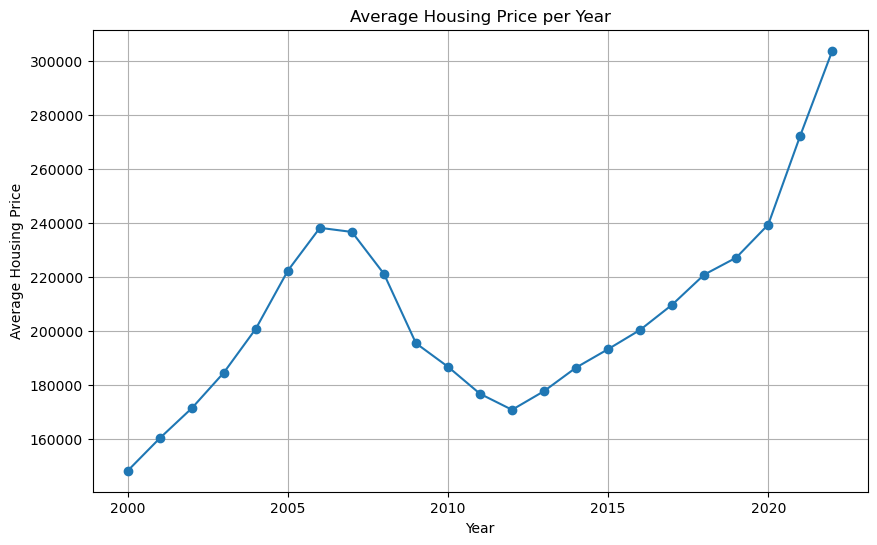

In [46]:
# Average housing price plot per year
price_by_year = df2.groupby('Year')['Price'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(price_by_year.index, price_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.title('Average Housing Price per Year')
plt.grid(True)
plt.show()

In [113]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2.describe()

Price    Bedrooms        Year       Month
count 7776276.000 7776276.000 7776276.000 7776276.000
mean   210761.563       2.893    2012.613       6.519
std    148202.630       0.871       6.435       3.450
min      7725.841       1.000    2000.000       1.000
25%    111597.707       2.000    2008.000       4.000
50%    168738.942       3.000    2013.000       7.000
75%    262413.763       4.000    2018.000      10.000
max    999999.268       4.000    2022.000      12.000

In [47]:
# rearrange columns, such that target 'Price' is first.
columns = list(df2.columns)
columns.remove('Price')
new_order = ['Price'] + columns
df2 = df2[new_order]
df2

Price State             County        Time  Bedrooms  Year  \
0        158704.158466    NY      Queens County  2000-01-31         1  2000   
1        142042.736354    TX     Tarrant County  2000-01-31         3  2000   
2        151032.122248    IA        Linn County  2000-01-31         3  2000   
3        137097.551500    OH      Summit County  2000-01-31         3  2000   
4        133334.515021    VT  Washington County  2000-01-31         3  2000   
...                ...   ...                ...         ...       ...   ...   
7776271  324835.405696    FL      Marion County  2022-12-31         3  2022   
7776272  287029.753423    PA       Adams County  2022-12-31         3  2022   
7776273  153940.746210    LA     Rapides Parish  2022-12-31         3  2022   
7776274  237366.825163    SC  Orangeburg County  2022-12-31         3  2022   
7776275  119779.800812    KS      Barton County  2022-12-31         4  2022   

         Month  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
7776271     12  
7776272     12  
7776273     12  
7776274     12  
7776275     12  

[7776276 rows x 7 columns]

### Normalize Price

In [48]:
from sklearn.preprocessing import MinMaxScaler

price_column = df2[['Price']]

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the 'Price' column
price_normalized = scaler.fit_transform(price_column)

# Convert the normalized data back to a DataFrame
price_normalized_df = pd.DataFrame(price_normalized, columns=['Price'])

# Print the normalized 'Price' column
price_normalized_df

Price
0        0.152154
1        0.135363
2        0.144422
3        0.130379
4        0.126587
...           ...
7776271  0.319579
7776272  0.281479
7776273  0.147353
7776274  0.231429
7776275  0.112926

[7776276 rows x 1 columns]

In [116]:
# ### save scaler
# import joblib
# joblib.dump(scaler, 'minmax_scaler.pkl') 

['minmax_scaler.pkl']

In [49]:
# Replace original Price column with normalized Price column 
df3 = df2.drop(columns = ['Price'])
df3

State             County        Time  Bedrooms  Year  Month
0          NY      Queens County  2000-01-31         1  2000      1
1          TX     Tarrant County  2000-01-31         3  2000      1
2          IA        Linn County  2000-01-31         3  2000      1
3          OH      Summit County  2000-01-31         3  2000      1
4          VT  Washington County  2000-01-31         3  2000      1
...       ...                ...         ...       ...   ...    ...
7776271    FL      Marion County  2022-12-31         3  2022     12
7776272    PA       Adams County  2022-12-31         3  2022     12
7776273    LA     Rapides Parish  2022-12-31         3  2022     12
7776274    SC  Orangeburg County  2022-12-31         3  2022     12
7776275    KS      Barton County  2022-12-31         4  2022     12

[7776276 rows x 6 columns]

In [50]:
# Include normalized Price column
df3.insert(loc=len(df3.columns), column='Price', value= price_normalized)
df3

State             County        Time  Bedrooms  Year  Month     Price
0          NY      Queens County  2000-01-31         1  2000      1  0.152154
1          TX     Tarrant County  2000-01-31         3  2000      1  0.135363
2          IA        Linn County  2000-01-31         3  2000      1  0.144422
3          OH      Summit County  2000-01-31         3  2000      1  0.130379
4          VT  Washington County  2000-01-31         3  2000      1  0.126587
...       ...                ...         ...       ...   ...    ...       ...
7776271    FL      Marion County  2022-12-31         3  2022     12  0.319579
7776272    PA       Adams County  2022-12-31         3  2022     12  0.281479
7776273    LA     Rapides Parish  2022-12-31         3  2022     12  0.147353
7776274    SC  Orangeburg County  2022-12-31         3  2022     12  0.231429
7776275    KS      Barton County  2022-12-31         4  2022     12  0.112926

[7776276 rows x 7 columns]

In [51]:
# rearrange columns, such that target 'Price' is first.
columns = list(df3.columns)
columns.remove('Price')
new_order = ['Price'] + columns
df3 = df3[new_order]
df3

Price State             County        Time  Bedrooms  Year  Month
0        0.152154    NY      Queens County  2000-01-31         1  2000      1
1        0.135363    TX     Tarrant County  2000-01-31         3  2000      1
2        0.144422    IA        Linn County  2000-01-31         3  2000      1
3        0.130379    OH      Summit County  2000-01-31         3  2000      1
4        0.126587    VT  Washington County  2000-01-31         3  2000      1
...           ...   ...                ...         ...       ...   ...    ...
7776271  0.319579    FL      Marion County  2022-12-31         3  2022     12
7776272  0.281479    PA       Adams County  2022-12-31         3  2022     12
7776273  0.147353    LA     Rapides Parish  2022-12-31         3  2022     12
7776274  0.231429    SC  Orangeburg County  2022-12-31         3  2022     12
7776275  0.112926    KS      Barton County  2022-12-31         4  2022     12

[7776276 rows x 7 columns]

### Binary Encoding for State and County categorical variables

In [52]:
from category_encoders import BinaryEncoder

# Initialize Binary Encoder
binary_encoder = BinaryEncoder(cols=['County', 'State'])

# Encode 'County' variable
encoded_data = binary_encoder.fit_transform(df3)

print("*** ORIGINAL DATA WITH CATEGORICAL STATE AND COUNTY *** ")
print(df3)

print("\n *** DATA WITH BINARY ENCODED STATE AND COUNTY *** ")
print(encoded_data) 

*** ORIGINAL DATA WITH CATEGORICAL STATE AND COUNTY *** 
            Price State             County        Time  Bedrooms  Year  Month
0        0.152154    NY      Queens County  2000-01-31         1  2000      1
1        0.135363    TX     Tarrant County  2000-01-31         3  2000      1
2        0.144422    IA        Linn County  2000-01-31         3  2000      1
3        0.130379    OH      Summit County  2000-01-31         3  2000      1
4        0.126587    VT  Washington County  2000-01-31         3  2000      1
...           ...   ...                ...         ...       ...   ...    ...
7776271  0.319579    FL      Marion County  2022-12-31         3  2022     12
7776272  0.281479    PA       Adams County  2022-12-31         3  2022     12
7776273  0.147353    LA     Rapides Parish  2022-12-31         3  2022     12
7776274  0.231429    SC  Orangeburg County  2022-12-31         3  2022     12
7776275  0.112926    KS      Barton County  2022-12-31         4  2022     12

[77762

In [ ]:
# ## Save binary encoder
# import joblib
# joblib.dump(binary_encoder, 'binary_encoder.pkl')

In [53]:
# check columns of final dataset to be used for training
encoded_data.columns

Index(['Price', 'State_0', 'State_1', 'State_2', 'State_3', 'State_4',
       'State_5', 'County_0', 'County_1', 'County_2', 'County_3', 'County_4',
       'County_5', 'County_6', 'County_7', 'County_8', 'County_9', 'County_10',
       'Time', 'Bedrooms', 'Year', 'Month'],
      dtype='object')

## Save/load dataframe (normalized)

In [123]:
# # save 
# encoded_data.to_csv('csv_housing_XGBoost_PriceLimit_2000-2022_minmax_normalized', index = False)

In [10]:
# load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
finalData = pd.read_csv('csv_housing_XGBoost_PriceLimit_2000-2022_minmax_normalized')
finalData

Price  State_0  State_1  State_2  State_3  State_4  State_5  \
0        0.152154        0        0        0        0        0        1   
1        0.135363        0        0        0        0        1        0   
2        0.144422        0        0        0        0        1        1   
3        0.130379        0        0        0        1        0        0   
4        0.126587        0        0        0        1        0        1   
...           ...      ...      ...      ...      ...      ...      ...   
7776271  0.319579        0        1        0        0        1        0   
7776272  0.281479        0        1        1        0        0        1   
7776273  0.147353        1        0        1        0        1        0   
7776274  0.231429        1        0        0        0        0        0   
7776275  0.112926        1        0        0        1        1        1   

         County_0  County_1  County_2  ...  County_5  County_6  County_7  \
0               0         0         0  ...         0         0         0   
1               0         0         0  ...         0         0         0   
2               0         0         0  ...         0         0         0   
3               0         0         0  ...         0         0         0   
4               0         0         0  ...         0         0         0   
...           ...       ...       ...  ...       ...       ...       ...   
7776271         0         0         1  ...         1         1         0   
7776272         0         0         1  ...         0         0         0   
7776273         0         0         1  ...         1         1         1   
7776274         0         1         1  ...         1         1         0   
7776275         1         0         1  ...         1         1         1   

         County_8  County_9  County_10        Time  Bedrooms  Year  Month  
0               0         0          1  2000-01-31         1  2000      1  
1               0         1          0  2000-01-31         3  2000      1  
2               0         1          1  2000-01-31         3  2000      1  
3               1         0          0  2000-01-31         3  2000      1  
4               1         0          1  2000-01-31         3  2000      1  
...           ...       ...        ...         ...       ...   ...    ...  
7776271         0         0          1  2022-12-31         3  2022     12  
7776272         1         1          0  2022-12-31         3  2022     12  
7776273         1         1          0  2022-12-31         3  2022     12  
7776274         1         0          0  2022-12-31         3  2022     12  
7776275         0         0          1  2022-12-31         4  2022     12  

[7776276 rows x 22 columns]

In [11]:
print(f"NaN values = {finalData.isna().any(axis=1).sum()}")

NaN values = 0


## Exploratory analysis

In [12]:
columns_without_time = list(finalData.columns)
columns_without_time.remove('Time')
columns_without_time

['Price',
 'State_0',
 'State_1',
 'State_2',
 'State_3',
 'State_4',
 'State_5',
 'County_0',
 'County_1',
 'County_2',
 'County_3',
 'County_4',
 'County_5',
 'County_6',
 'County_7',
 'County_8',
 'County_9',
 'County_10',
 'Bedrooms',
 'Year',
 'Month']

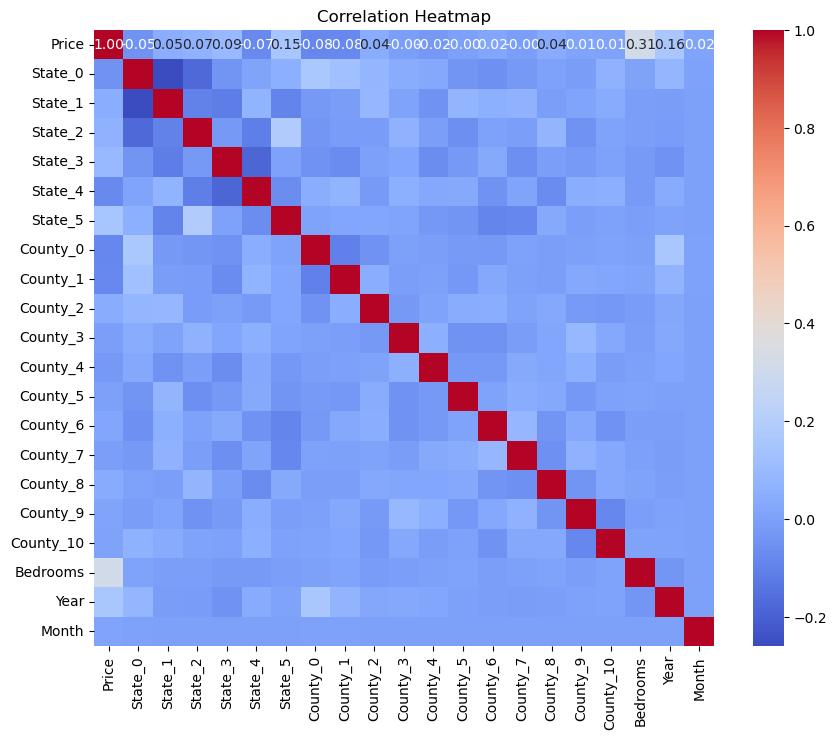

In [56]:
correlation_matrix = finalData[columns_without_time].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

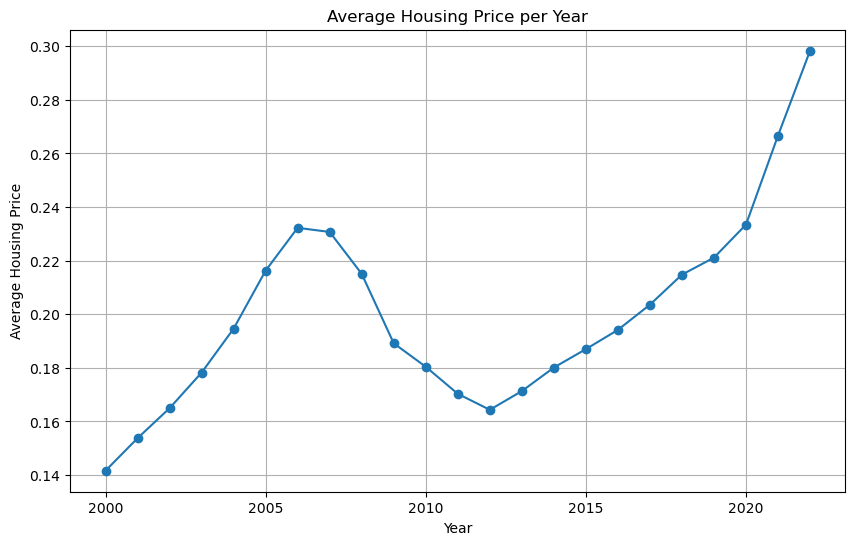

In [57]:
# Average housing price plot per year
price_by_year = finalData.groupby('Year')['Price'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(price_by_year.index, price_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.title('Average Housing Price per Year')
plt.grid(True)
plt.show()

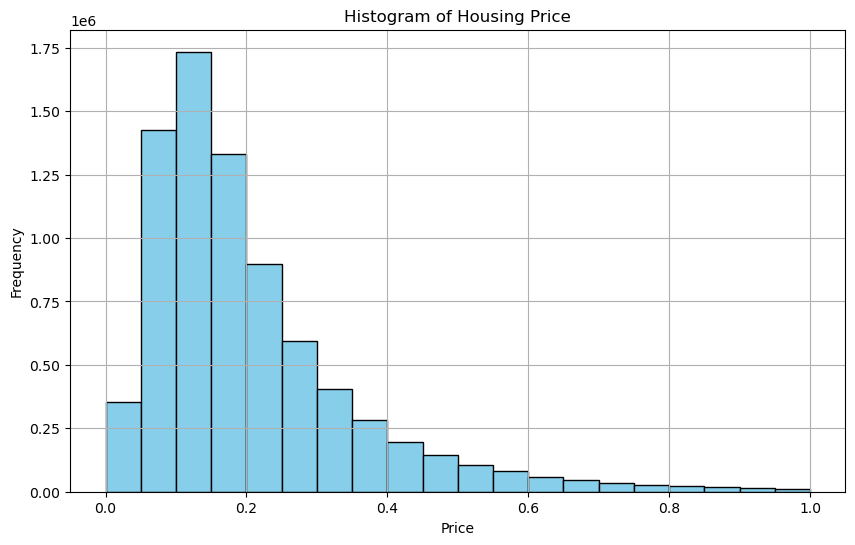

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histogram to see distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(finalData['Price'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Price')
plt.grid(True)
plt.show()

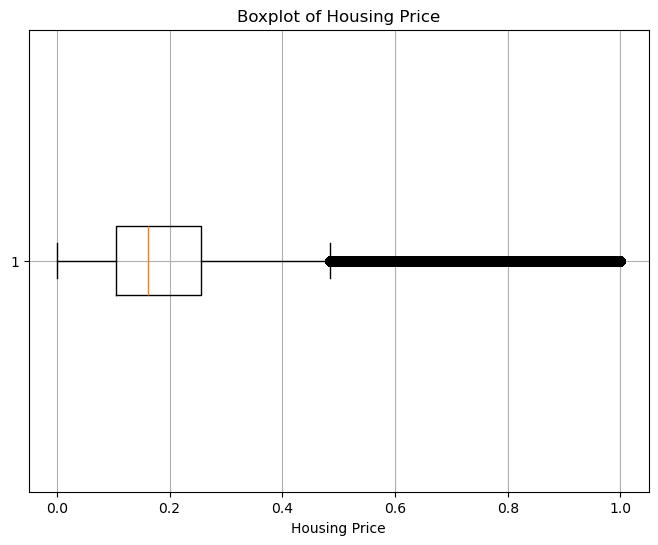

In [59]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(finalData['Price'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('Housing Price')
plt.title('Boxplot of Housing Price')
plt.grid(True)
plt.show()

### Handle outliers 

In [13]:
# Exclude higher values
finalData = finalData[(finalData['Price'] < 0.45) ]
finalData['Price'] = finalData[finalData['Price'] > 0].Price

/tmp/ipykernel_524972/3643432720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['Price'] = finalData[finalData['Price'] > 0].Price


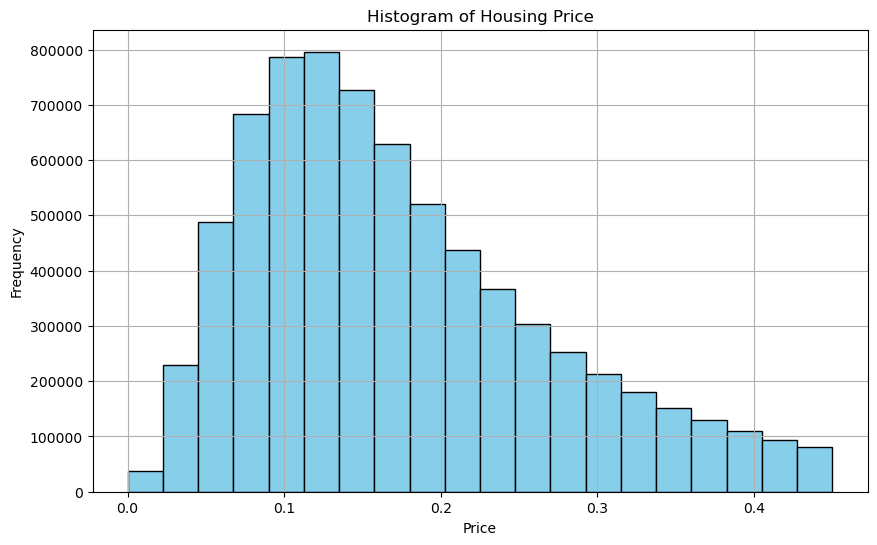

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histogram to see distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(finalData['Price'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Price')
plt.grid(True)
plt.show()

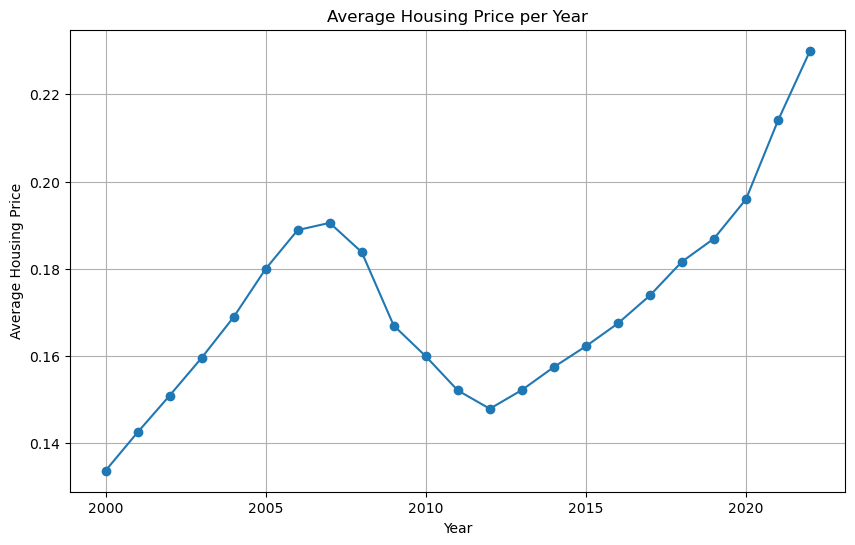

In [15]:
# Average housing price plot per year
price_by_year = finalData.groupby('Year')['Price'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(price_by_year.index, price_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.title('Average Housing Price per Year')
plt.grid(True)
plt.show()

In [67]:
finalData.isna().sum()

Price        0
State_0      0
State_1      0
State_2      0
State_3      0
State_4      0
State_5      0
County_0     0
County_1     0
County_2     0
County_3     0
County_4     0
County_5     0
County_6     0
County_7     0
County_8     0
County_9     0
County_10    0
Time         0
Bedrooms     0
Year         0
Month        0
dtype: int64

In [81]:
finalData.dropna(inplace = True)

In [82]:
finalData['Price'].skew()

0.7969193018100058

In [83]:
len(finalData)

7218247

In [84]:
finalData.describe()

Price       State_0       State_1       State_2       State_3  \
count  7.218247e+06  7.218247e+06  7.218247e+06  7.218247e+06  7.218247e+06   
mean   1.735455e-01  1.484381e-01  3.986857e-01  4.226336e-01  4.979814e-01   
std    9.583208e-02  3.555338e-01  4.896279e-01  4.939782e-01  4.999960e-01   
min    6.809452e-05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.007266e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.530702e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.295018e-01  0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
max    4.500000e-01  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

            State_4       State_5      County_0      County_1      County_2  \
count  7.218247e+06  7.218247e+06  7.218247e+06  7.218247e+06  7.218247e+06   
mean   4.756641e-01  4.969560e-01  5.840559e-02  2.000469e-01  3.872994e-01   
std    4.994074e-01  4.999908e-01  2.345088e-01  4.000352e-01  4.871331e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

       ...      County_4      County_5      County_6      County_7  \
count  ...  7.218247e+06  7.218247e+06  7.218247e+06  7.218247e+06   
mean   ...  4.130754e-01  4.974263e-01  5.106809e-01  4.800427e-01   
std    ...  4.923862e-01  4.999934e-01  4.998859e-01  4.996016e-01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
75%    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
max    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

           County_8      County_9     County_10      Bedrooms          Year  \
count  7.218247e+06  7.218247e+06  7.218247e+06  7.218247e+06  7.218247e+06   
mean   4.843779e-01  4.957788e-01  4.891038e-01  2.856556e+00  2.012455e+03   
std    4.997559e-01  4.999822e-01  4.998813e-01  8.667049e-01  6.409010e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  2.000000e+03   
25%    0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  2.007000e+03   
50%    0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00  2.013000e+03   
75%    1.000000e+00  1.000000e+00  1.000000e+00  4.000000e+00  2.018000e+03   
max    1.000000e+00  1.000000e+00  1.000000e+00  4.000000e+00  2.022000e+03   

              Month  
count  7.218247e+06  
mean   6.509603e+00  
std    3.450363e+00  
min    1.000000e+00  
25%    4.000000e+00  
50%    7.000000e+00  
75%    1.000000e+01  
max    1.200000e+01  

[8 rows x 21 columns]

## Take log of price

In [85]:
import numpy as np
finalData['Price'] = np.log(finalData['Price'])

In [86]:
finalData['Price'].skew()

-0.5504154466673341

In [87]:
finalData.isna().sum()

Price        0
State_0      0
State_1      0
State_2      0
State_3      0
State_4      0
State_5      0
County_0     0
County_1     0
County_2     0
County_3     0
County_4     0
County_5     0
County_6     0
County_7     0
County_8     0
County_9     0
County_10    0
Time         0
Bedrooms     0
Year         0
Month        0
dtype: int64

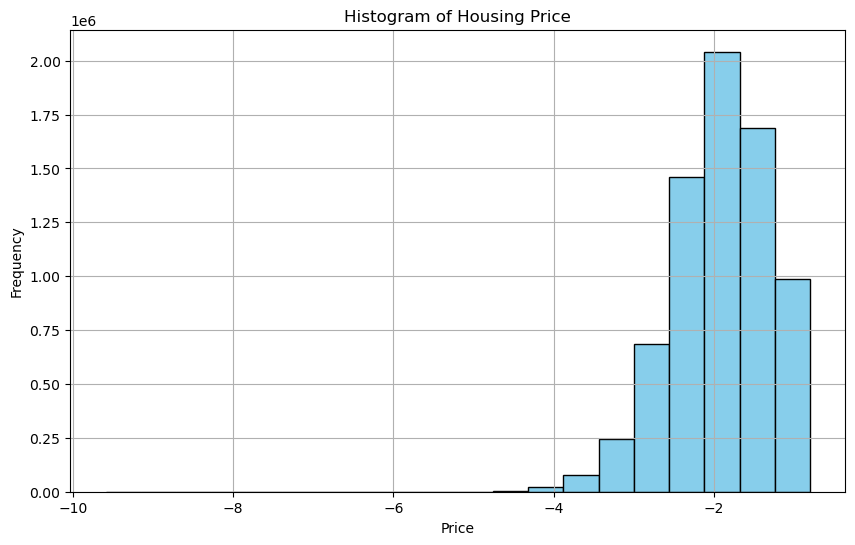

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histogram to see distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(finalData['Price'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Price')
plt.grid(True)
plt.show()

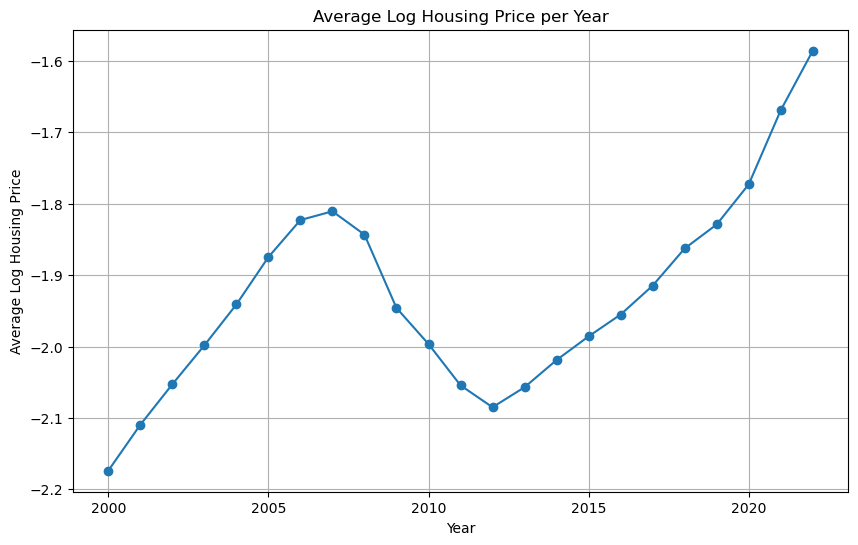

In [277]:
# Average housing price plot per year
price_by_year = finalData.groupby('Year')['Price'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(price_by_year.index, price_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Log Housing Price')
plt.title('Average Log Housing Price per Year')
plt.grid(True)
plt.show()

In [278]:
finalData.describe()

Price     State_0     State_1     State_2     State_3     State_4  \
count 7218247.000 7218247.000 7218247.000 7218247.000 7218247.000 7218247.000   
mean       -1.917       0.148       0.399       0.423       0.498       0.476   
std         0.607       0.356       0.490       0.494       0.500       0.499   
min        -9.595       0.000       0.000       0.000       0.000       0.000   
25%        -2.295       0.000       0.000       0.000       0.000       0.000   
50%        -1.877       0.000       0.000       0.000       0.000       0.000   
75%        -1.472       0.000       1.000       1.000       1.000       1.000   
max        -0.799       1.000       1.000       1.000       1.000       1.000   

          State_5    County_0    County_1    County_2  ...    County_4  \
count 7218247.000 7218247.000 7218247.000 7218247.000  ... 7218247.000   
mean        0.497       0.058       0.200       0.387  ...       0.413   
std         0.500       0.235       0.400       0.487  ...       0.492   
min         0.000       0.000       0.000       0.000  ...       0.000   
25%         0.000       0.000       0.000       0.000  ...       0.000   
50%         0.000       0.000       0.000       0.000  ...       0.000   
75%         1.000       0.000       0.000       1.000  ...       1.000   
max         1.000       1.000       1.000       1.000  ...       1.000   

         County_5    County_6    County_7    County_8    County_9   County_10  \
count 7218247.000 7218247.000 7218247.000 7218247.000 7218247.000 7218247.000   
mean        0.497       0.511       0.480       0.484       0.496       0.489   
std         0.500       0.500       0.500       0.500       0.500       0.500   
min         0.000       0.000       0.000       0.000       0.000       0.000   
25%         0.000       0.000       0.000       0.000       0.000       0.000   
50%         0.000       1.000       0.000       0.000       0.000       0.000   
75%         1.000       1.000       1.000       1.000       1.000       1.000   
max         1.000       1.000       1.000       1.000       1.000       1.000   

         Bedrooms        Year       Month  
count 7218247.000 7218247.000 7218247.000  
mean        2.857    2012.455       6.510  
std         0.867       6.409       3.450  
min         1.000    2000.000       1.000  
25%         2.000    2007.000       4.000  
50%         3.000    2013.000       7.000  
75%         4.000    2018.000      10.000  
max         4.000    2022.000      12.000  

[8 rows x 21 columns]

In [112]:
total = len(finalData)

testing = len(finalData[(finalData.Year >= 2018) & (finalData.Year <= 2021)])

print(f"Testing data is {(testing/total) * 100}% of the data")

Testing data is 22.258382125189122% of the data


## Feature matrix and target vector (sort by Time)

In [89]:
# rearrange columns, such that target 'Price' is first and 'Time' is second.
columns = list(finalData.columns)
columns.remove('Time')
columns.remove('Price')
new_order = ['Price', 'Time'] + columns
finalData = finalData[new_order]

finalData = finalData.sort_values(by= 'Time')
finalData.reset_index(drop=True, inplace=True) 
finalData

Price        Time  State_0  State_1  State_2  State_3  State_4  \
0       -1.882862  2000-01-31        0        0        0        0        0   
1       -0.938259  2000-01-31        0        0        0        0        0   
2       -2.379114  2000-01-31        0        0        1        0        1   
3       -1.809073  2000-01-31        0        0        0        1        1   
4       -2.162671  2000-01-31        0        0        1        0        0   
...           ...         ...      ...      ...      ...      ...      ...   
7218242 -1.409373  2022-12-31        0        0        1        1        0   
7218243 -2.108308  2022-12-31        0        0        1        1        1   
7218244 -1.400734  2022-12-31        0        0        1        1        0   
7218245 -1.699282  2022-12-31        1        1        0        0        0   
7218246 -2.181018  2022-12-31        1        0        0        1        1   

         State_5  County_0  County_1  ...  County_4  County_5  County_6  \
0              1         0         0  ...         0         0         0   
1              1         0         0  ...         1         1         0   
2              1         0         1  ...         1         0         0   
3              1         0         0  ...         0         0         0   
4              0         0         0  ...         0         1         1   
...          ...       ...       ...  ...       ...       ...       ...   
7218242        0         0         0  ...         1         0         1   
7218243        1         0         1  ...         1         0         1   
7218244        0         0         1  ...         0         0         1   
7218245        0         0         1  ...         0         1         0   
7218246        1         1         0  ...         0         1         1   

         County_7  County_8  County_9  County_10  Bedrooms  Year  Month  
0               0         0         0          1         1  2000      1  
1               1         1         1          0         3  2000      1  
2               1         0         0          0         3  2000      1  
3               1         0         0          1         3  2000      1  
4               0         0         0          0         3  2000      1  
...           ...       ...       ...        ...       ...   ...    ...  
7218242         1         0         0          0         3  2022     12  
7218243         0         1         1          1         3  2022     12  
7218244         1         0         0          0         3  2022     12  
7218245         0         1         1          0         3  2022     12  
7218246         1         0         0          1         4  2022     12  

[7218247 rows x 22 columns]

In [90]:
# get feature matrix (everything except Price and Time)
X = finalData.iloc[:, 2:]
print("--- FEATURE MATRIX --- ")
print(X, "\n")

print("--- PRICE COLUMN (TARGET) --- ")
y = finalData.iloc[:, 0]
print(y)

--- FEATURE MATRIX --- 
         State_0  State_1  State_2  State_3  State_4  State_5  County_0  \
0              0        0        0        0        0        1         0   
1              0        0        0        0        0        1         0   
2              0        0        1        0        1        1         0   
3              0        0        0        1        1        1         0   
4              0        0        1        0        0        0         0   
...          ...      ...      ...      ...      ...      ...       ...   
7218242        0        0        1        1        0        0         0   
7218243        0        0        1        1        1        1         0   
7218244        0        0        1        1        0        0         0   
7218245        1        1        0        0        0        0         0   
7218246        1        0        0        1        1        1         1   

         County_1  County_2  County_3  County_4  County_5  County_6  County

## Baseline

In [91]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calculate the mean of the target variable (housing prices)
baseline_prediction = np.mean(y)

# Create an array of baseline predictions with the same length as the true target values
baseline_predictions = np.full_like(y, baseline_prediction)

# Calculate metrics using the baseline predictions
baseline_mse = mean_squared_error(y, baseline_predictions)
baseline_absError = mean_absolute_error(y, baseline_predictions)
baseline_rsquared = r2_score(y, baseline_predictions)

print("Baseline Mean Squared Error (MSE):", baseline_mse)
print("Baseline R-Squared Error (r2_score):", baseline_rsquared)
print("Baseline Root Mean Squared Error (RMSE):", np.sqrt(baseline_mse))
print("Baseline Mean Absolute Error (MAE):", baseline_absError)

Baseline Mean Squared Error (MSE): 0.3689501204661574
Baseline R-Squared Error (r2_score): 0.0
Baseline Root Mean Squared Error (RMSE): 0.6074126443087577
Baseline Mean Absolute Error (MAE): 0.48397182172945286


In [92]:
backup = finalData.copy()

In [93]:
def baseline(y):
    # Calculate the mean of the target variable (housing prices)
    baseline_prediction = np.mean(y)
    
    # Create an array of baseline predictions with the same length as the true target values
    baseline_predictions = np.full_like(y, baseline_prediction)
    
    # Calculate metrics using the baseline predictions
    baseline_mse = mean_squared_error(y, baseline_predictions)
    baseline_absError = mean_absolute_error(y, baseline_predictions)
    baseline_rsquared = r2_score(y, baseline_predictions)
    
    print("Baseline MSE:", baseline_mse)
    print("Baseline R2:", baseline_rsquared)
    return(baseline_mse, baseline_rsquared)

### Function: check_feature_importance

In [94]:
### Feature importance
X_columns = X.columns
def check_feature_importance(model):
    feature_importances = dict(zip(X_columns, model.feature_importances_))
    
    # Sort feature importances by their scores in descending order
    sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
    
    features = [feature for feature, _ in sorted_feature_importances]
    importances = [importance for _, importance in sorted_feature_importances]
    
    # Create horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances, color='skyblue')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
    plt.show()

### Function: plot_predicted_vs_true

In [95]:
import matplotlib.pyplot as plt

# Function to plot predicted vs. true values
def plot_predicted_vs_true(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    
    # Plot true values in blue
    plt.scatter(y_true, y_true, color='black', label='True Values')
    
    # Plot predicted values in green
    plt.scatter(y_pred, y_true, color='blue', label='Predicted Values')
    
    # Plot a diagonal line representing perfect predictions
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Perfect Predictions')
    
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.title('Predicted vs. True Values')
    plt.legend()
    plt.grid(True)
    plt.show()

### Perform cross validation on a rolling basis 

In [96]:
# adapted from: https://kili-technology.com/data-labeling/machine-learning/cross-validation-in-machine-learning#rolling-cross-validation-python-code-example

# Import necessary libraries
from xgboost import XGBRegressor 
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
from typing import List, Dict, Union, Callable
from typing import Any

def rolling_cross_validation(
        validation_years,
        model: Any,
        X: np.ndarray,
        y: np.ndarray,
        metrics: Union[List[Callable], Callable] = mean_squared_error,
        int_verbose: int = 100
    ):
    
    """
    Perform rolling cross-validation on time-series data.

    Parameters:
    - validation_years: years used for validation to prevent overfitting model
    - model: The machine learning model to use (should have fit and predict methods)
    - X: The feature matrix as np.array
    - y: The target vector
    - metrics: A metric or list of metrics to calculate
    - int_verbose: How often to print debugging information
    """
    baseline_mse = []
    baseline_r2 = []
    
    # If only a single metric is provided, put it in a list (otherwise, metrics is a Callable function, not a list -- causes issues)
    if callable(metrics):
        metrics = [metrics]

    # Initialize dictionary to hold metric results -- key is metric name and value an empty list.
    metric_results = {metric.__name__: [] for metric in metrics}

    # train_index and test_index contain all the indices of the training and test data, respectively.
    for val_year in validation_years:
        train_index = finalData[finalData['Year'] < val_year].index
        test_index = finalData[finalData['Year'] == val_year].index
        
        # Create train/test splits -- using array indexing to obtain rows in np.array X and y.
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit model on training subset, and monitor performance (avoid overfitting/obtain most generalizable model) 
        # with evaluation test subset. Passing eval set allows us to stop early if performance does not improve for a certain
        # number of consecutive rounds.
        model.fit(X_train, y_train,
                 eval_set = [(X_test, y_test)],
                 verbose = int_verbose)

        # Make predictions on features of test subset.
        # verified - predict():  If the model is trained with early stopping, then best_iteration is used automatically.
        y_pred = model.predict(X_test)
        
        # Calculate and store metric(s) -- compare predictions with true output for housing price
        for metric in metrics:
            metric_value = metric(y_test, y_pred)
            metric_results[metric.__name__].append(metric_value)

        print(f"\n Year = {val_year}")
        print(f"MSE = {metric_results['mean_squared_error'][-1]}")
        print(f"R-squared = {metric_results['r2_score'][-1]}")
        b_mse, b_r2 = baseline(y_test)
        baseline_mse.append(b_mse)
        baseline_r2.append(b_r2)
    
    # plot true values vs. predictions made for last validation year
    plot_predicted_vs_true(y_test, y_pred)

    # plot importance of features used by model
    check_feature_importance(model)

    print("--- Metric Results Across Folds: ----")
    print(metric_results)

    print(f"True values: {y_test}")
    print(f"Predictions: {y_pred}")

    # print mean MSE score of folds from cross validation
    avg_MSE_score = np.mean(metric_results['mean_squared_error'])
    print(f"Average MSE score: {avg_MSE_score}")

    # print mean r-squared score of folds from cross validation
    avg_rsquared_score = np.mean(metric_results['r2_score'])
    print(f"Average r2 score: {avg_rsquared_score}")

     # ---- print average baseline scores -----
    baseline_mse = np.array(baseline_mse)
    baseline_r2 = np.array(baseline_r2)
    
    avg_baseline_mse = np.mean(baseline_mse)
    print(f"Average baseline MSE: {avg_baseline_mse}")

    avg_baseline_r2 = np.mean(baseline_r2)
    print(f"Average baseline r2: {avg_baseline_r2}")
    
    return (avg_MSE_score, avg_rsquared_score)

In [288]:
# check types of X and y
# Note: Series in Pandas refers to a single column of a DataFrame.
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Train and evaluate 

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

# Define metrics to be used for evaluation.
metrics = [mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score]

# Note --  Objective of model:
# The default objective for XGBRegressor is reg:squarederror. This means that XGBoost
# will try to minimize the mean squared error between the predicted and actual values.

#### Hyperparameter tuning


--- START TUNING SESSION ---
n_estimator = 100, learning_rate = 0.1
[0]	validation_0-rmse:0.63961
[99]	validation_0-rmse:0.46114

 Year = 2015
MSE = 0.2126518643902211
R-squared = 0.5107922981818884
Baseline MSE: 0.43468625616463724
Baseline R2: 0.0
[0]	validation_0-rmse:0.65529
[99]	validation_0-rmse:0.47299

 Year = 2016
MSE = 0.22371676305347357
R-squared = 0.5071922058609932
Baseline MSE: 0.45396352434793175
Baseline R2: 0.0
[0]	validation_0-rmse:0.67315
[99]	validation_0-rmse:0.47945

 Year = 2017
MSE = 0.22987685537295866
R-squared = 0.5139777692997733
Baseline MSE: 0.4729760098458218
Baseline R2: 0.0
[0]	validation_0-rmse:0.69087
[99]	validation_0-rmse:0.49359

 Year = 2018
MSE = 0.24362922972723086
R-squared = 0.5002627588983686
Baseline MSE: 0.48751465708292896
Baseline R2: 0.0
[0]	validation_0-rmse:0.70196
[99]	validation_0-rmse:0.49844

 Year = 2019
MSE = 0.2484402830419351
R-squared = 0.49765574204798735
Baseline MSE: 0.4945618051946915
Baseline R2: 0.0
[0]	validation_0-rm

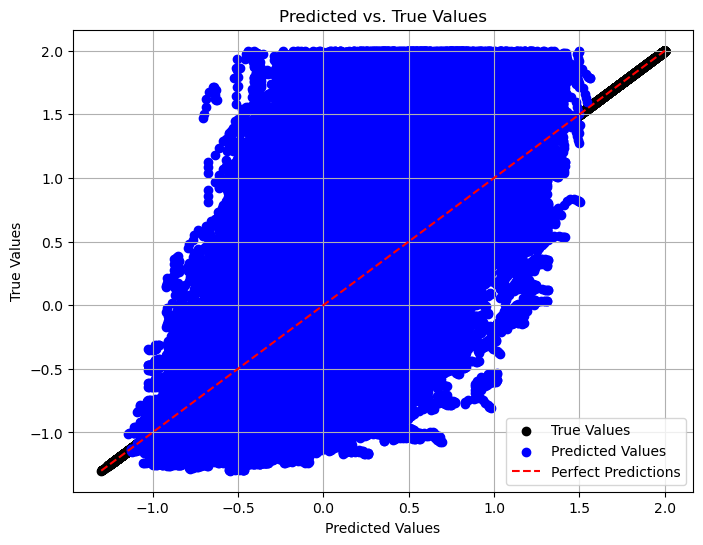

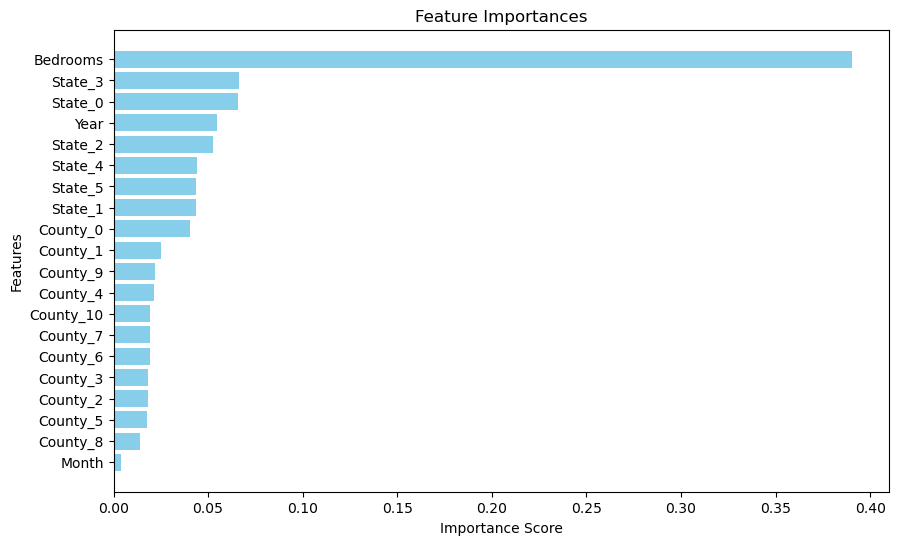

--- Metric Results Across Folds: ----
{'r2_score': [0.5107922981818884, 0.5071922058609932, 0.5139777692997733, 0.5002627588983686, 0.49765574204798735, 0.5094712345741872, 0.44542698357404076, 0.3994535408572427], 'mean_squared_error': [0.2126518643902211, 0.22371676305347357, 0.22987685537295866, 0.24362922972723086, 0.2484402830419351, 0.24886139111355515, 0.30392292713481595, 0.3395865722812835]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 0.02233185  0.03287936  0.1802159  ...  0.48534605  0.6635475
 -0.44000423]
Average MSE score: 0.25633573576443425
Average r2 score: 0.4855290666618102
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 100, learning_rate = 0.1
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 100, learning_rate = 0.2
[0]	validation_0-rmse:0.62139
[99]	validation_0-rmse:0.42184

 Year = 2015
MSE = 0.17794497205948004
R-squared = 0.5906358447365232
Bas

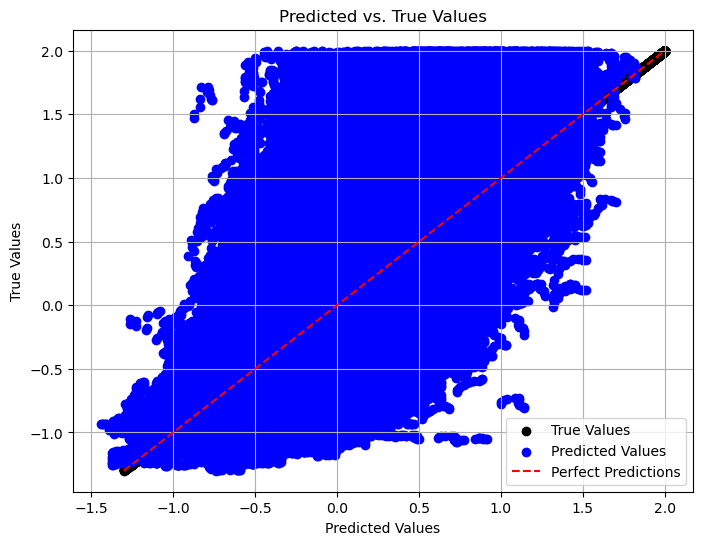

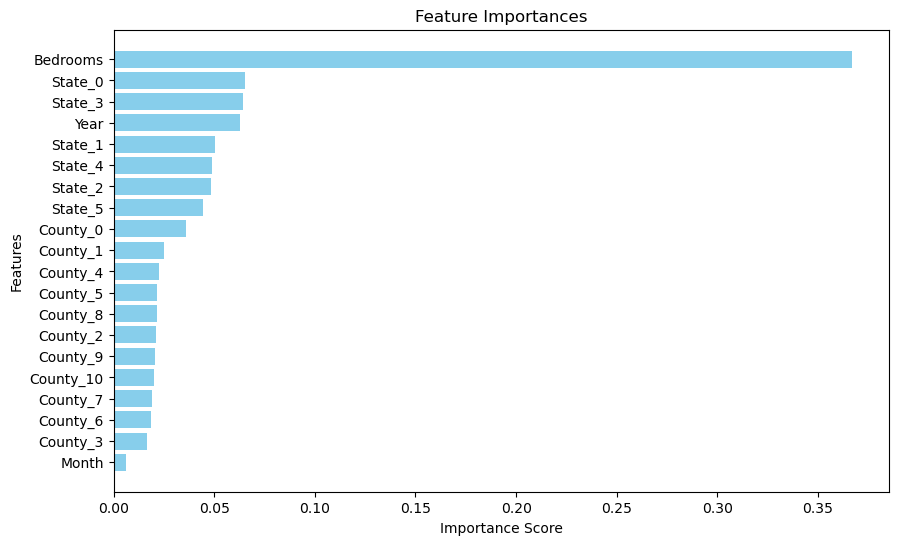

--- Metric Results Across Folds: ----
{'r2_score': [0.5906358447365232, 0.5845894639366895, 0.5855830698092412, 0.5990273389437921, 0.5940496929736792, 0.5955349594263075, 0.518530262454282, 0.5023622059437334], 'mean_squared_error': [0.17794497205948004, 0.18858123100256405, 0.19600926605417954, 0.19548004935444663, 0.20076751666227652, 0.20519843024209497, 0.2638601007037324, 0.2813955692327471]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 0.09222394 -0.23575403  0.3748054  ...  0.57518613  0.9241447
 -0.43122873]
Average MSE score: 0.21365464191394015
Average r2 score: 0.571289104778031
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 100, learning_rate = 0.2
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 100, learning_rate = 0.3
[0]	validation_0-rmse:0.60479
[99]	validation_0-rmse:0.40102

 Year = 2015
MSE = 0.16081303754091342
R-squared = 0.6300480282955955
Baseli

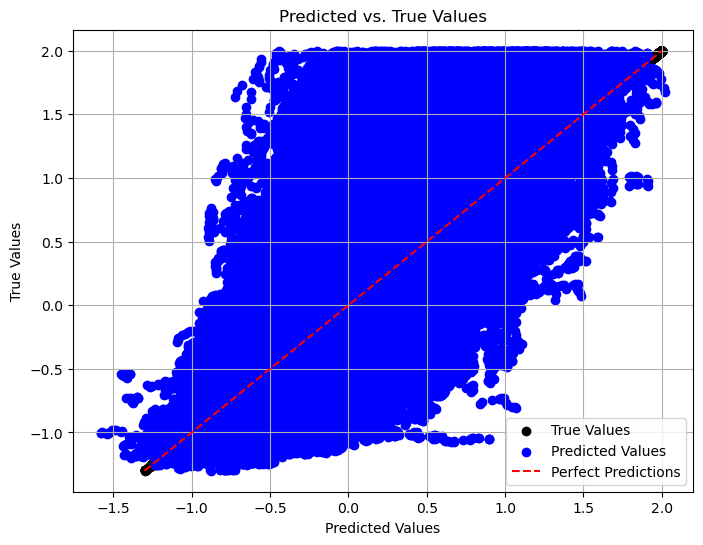

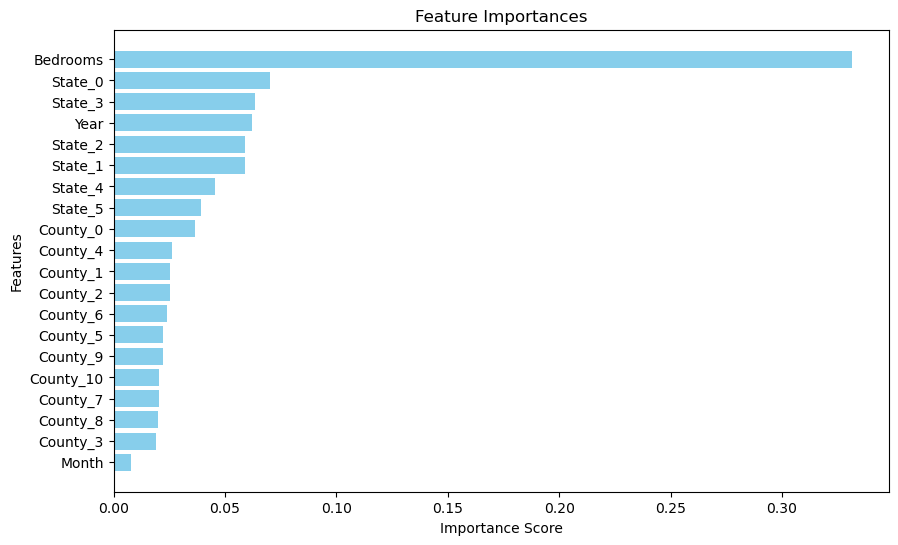

--- Metric Results Across Folds: ----
{'r2_score': [0.6300480282955955, 0.6263344868789601, 0.6335497557854908, 0.6380285512057693, 0.6401675062920043, 0.6313973435801703, 0.5640443755734468, 0.558267187400147], 'mean_squared_error': [0.16081303754091342, 0.1696305132637056, 0.17332217431560548, 0.17646638673273035, 0.17795940765593382, 0.18700426215608745, 0.2389169785621803, 0.24978339212769587]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 0.2545723  -0.36868873  0.514088   ...  0.7866242   1.2378926
 -0.5126232 ]
Average MSE score: 0.19173701904435653
Average r2 score: 0.6152296543764479
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 100, learning_rate = 0.3
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 100, learning_rate = 0.4
[0]	validation_0-rmse:0.58994
[99]	validation_0-rmse:0.39148

 Year = 2015
MSE = 0.1532559908823314
R-squared = 0.6474330883277667
Baseli

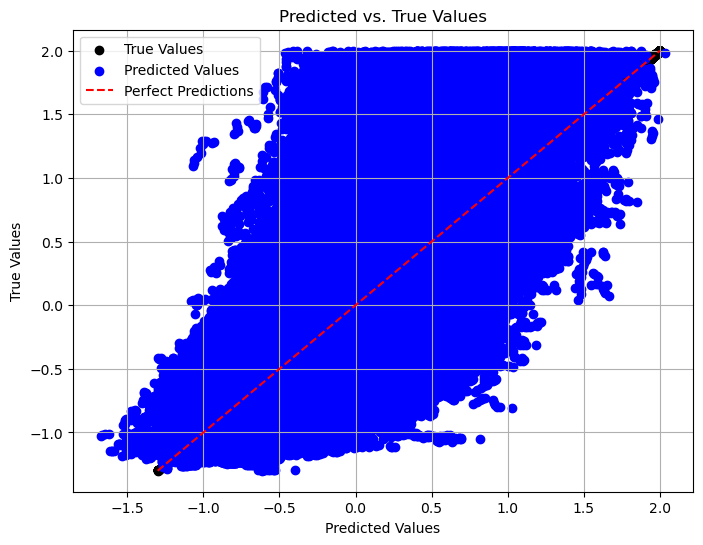

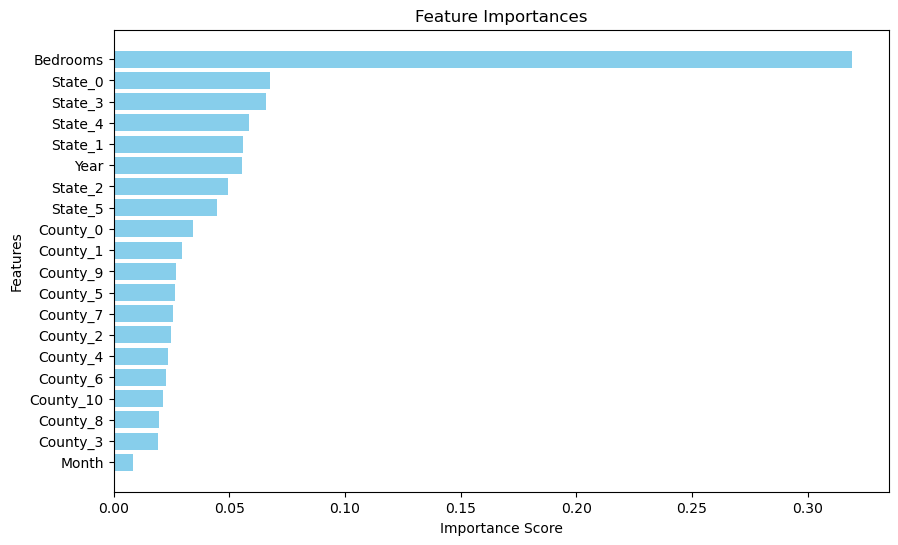

--- Metric Results Across Folds: ----
{'r2_score': [0.6474330883277667, 0.6496869989006793, 0.6538946193241069, 0.6617597889193156, 0.6552562030234536, 0.6663157564206033, 0.581273568145962, 0.5676604399263976], 'mean_squared_error': [0.1532559908823314, 0.15902932460394853, 0.1636995419382531, 0.16489706051665734, 0.17049711456239303, 0.1692890017933151, 0.22947485555274355, 0.2444718589741823]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 0.12583761 -0.5519893   0.5161756  ...  0.87660563  1.3029616
 -0.10009944]
Average MSE score: 0.18182684360297802
Average r2 score: 0.6354100578735355
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 100, learning_rate = 0.4
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 300, learning_rate = 0.1
[0]	validation_0-rmse:0.63961
[100]	validation_0-rmse:0.46046
[200]	validation_0-rmse:0.43107
[299]	validation_0-rmse:0.41372

 Year = 2015

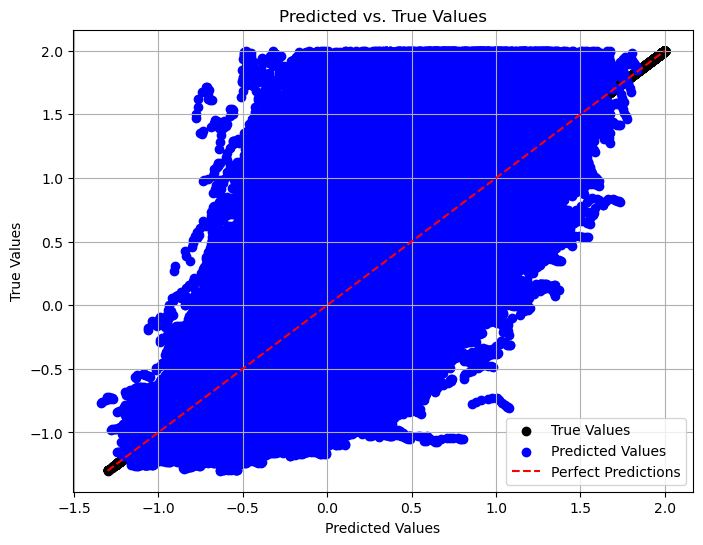

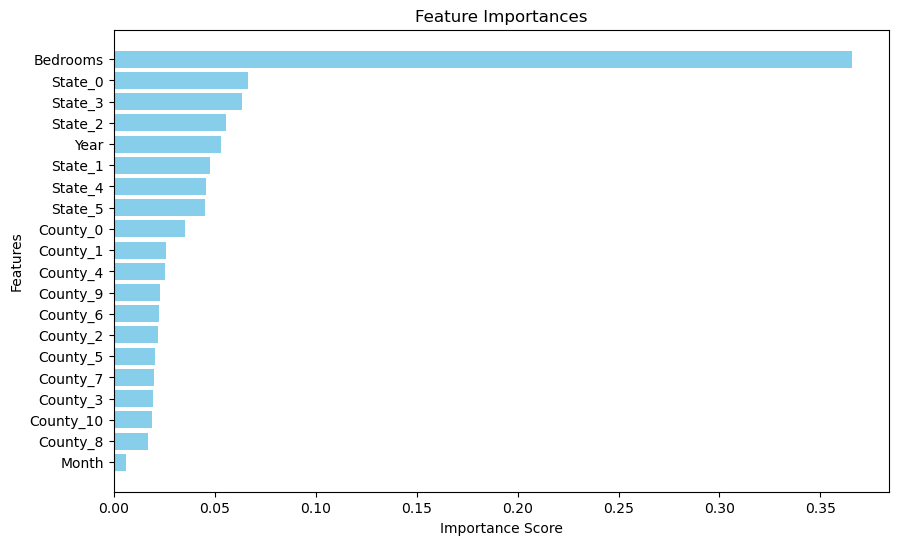

--- Metric Results Across Folds: ----
{'r2_score': [0.6062311527028459, 0.6166264606528808, 0.6168429174125158, 0.6171099396625285, 0.6196136178488352, 0.6190400335856738, 0.5562067965742303, 0.5294364127011458], 'mean_squared_error': [0.17116590602586462, 0.17403760306375873, 0.18122410806639422, 0.1866645164658844, 0.1881245758281579, 0.1932735323241321, 0.2432122108950542, 0.2660861174326176]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 9.4195292e-04 -3.0284956e-01  3.0545723e-01 ...  7.4172252e-01
  1.1277865e+00 -3.4566510e-01]
Average MSE score: 0.200473571262733
Average r2 score: 0.597638416392582
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 300, learning_rate = 0.1
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 300, learning_rate = 0.2
[0]	validation_0-rmse:0.62139
[100]	validation_0-rmse:0.42072
[200]	validation_0-rmse:0.39351
[299]	validation_0-rmse:0.380

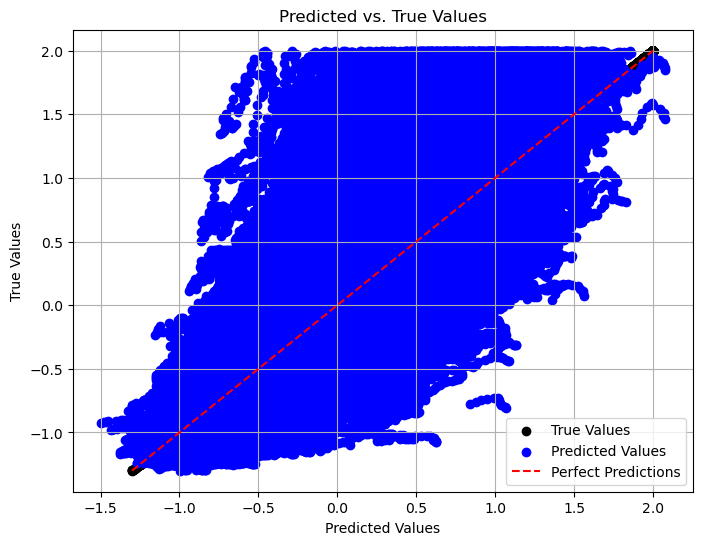

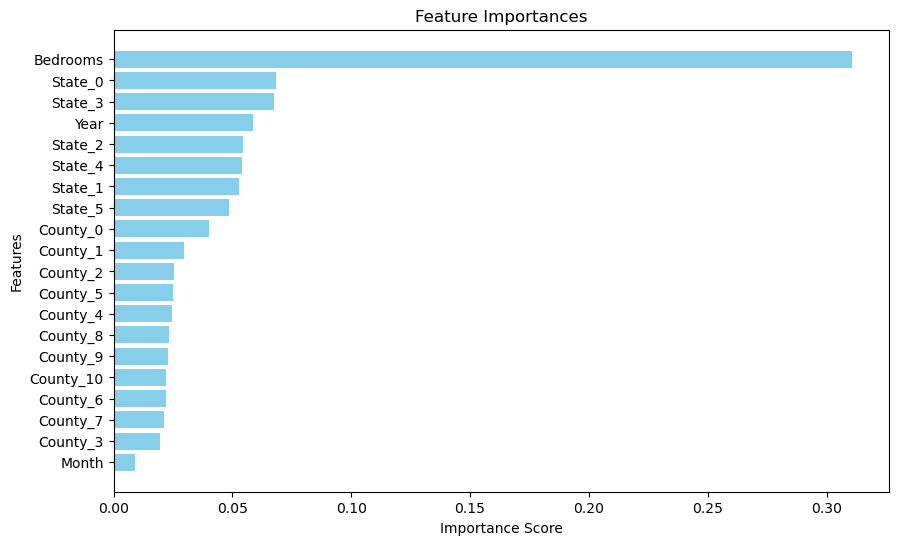

--- Metric Results Across Folds: ----
{'r2_score': [0.6660866844809754, 0.6615086328078266, 0.6713386915354393, 0.6779077061557353, 0.6841267189411604, 0.6811784085126773, 0.6076475861638426, 0.6003349392959362], 'mean_squared_error': [0.14514752900648603, 0.15366273401190897, 0.15544891426827467, 0.1570247141825407, 0.15621886009322983, 0.16174868910225493, 0.21502108928773667, 0.22599565105889938]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 0.07386209 -0.37543494  0.5723454  ...  0.8480679   1.3185064
 -0.31964183]
Average MSE score: 0.17128352262641638
Average r2 score: 0.656266170986699
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 300, learning_rate = 0.2
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 300, learning_rate = 0.3
[0]	validation_0-rmse:0.60479
[100]	validation_0-rmse:0.40087
[200]	validation_0-rmse:0.38067
[299]	validation_0-rmse:0.37253

 Year = 2

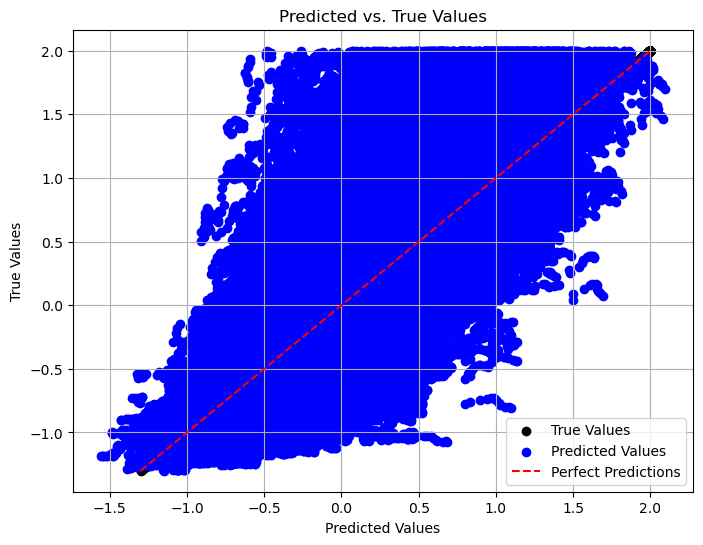

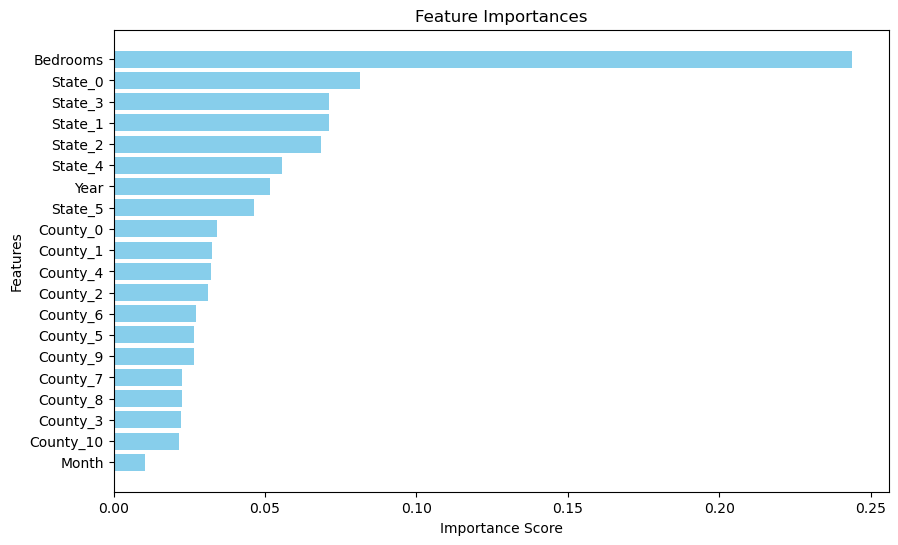

--- Metric Results Across Folds: ----
{'r2_score': [0.6807453197971498, 0.6803283249611703, 0.6933136324178553, 0.7002675418909263, 0.7076025792948328, 0.7038369888909324, 0.6324120618636044, 0.6255369265108881], 'mean_squared_error': [0.13877562170041546, 0.1451192802348339, 0.14505529441311177, 0.14612396653166845, 0.14460859621821914, 0.15025324534638065, 0.20144940130310227, 0.21174486942042522]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 0.04607208 -0.38971582  0.6860892  ...  1.003102    1.3173015
 -0.403497  ]
Average MSE score: 0.1603912843960196
Average r2 score: 0.67800542195342
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 300, learning_rate = 0.3
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 300, learning_rate = 0.4
[0]	validation_0-rmse:0.58994
[100]	validation_0-rmse:0.39121
[200]	validation_0-rmse:0.37493
[299]	validation_0-rmse:0.36790

 Year = 201

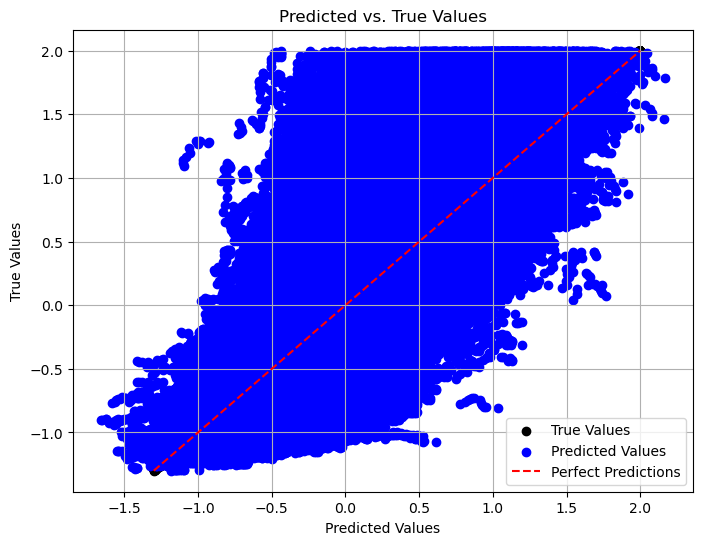

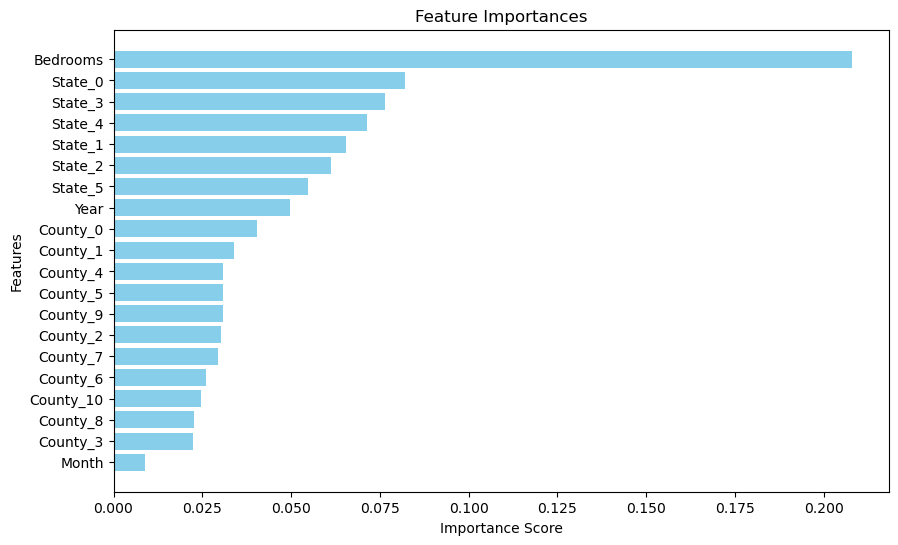

--- Metric Results Across Folds: ----
{'r2_score': [0.6886233946896908, 0.688195114032863, 0.7020523514949131, 0.7078456362208994, 0.7163380894318641, 0.717631004159168, 0.6420865435318934, 0.6345694011912005], 'mean_squared_error': [0.1353511308195922, 0.1415480449425465, 0.1409220899328814, 0.14242953447304954, 0.14028834655555247, 0.1432550872960269, 0.1961474902831833, 0.20663734265174996]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [-0.00624079 -0.48822492  0.6326359  ...  1.0039188   1.4279686
 -0.2840506 ]
Average MSE score: 0.1558223833693228
Average r2 score: 0.6871676918440615
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 300, learning_rate = 0.4
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 500, learning_rate = 0.1
[0]	validation_0-rmse:0.63961
[100]	validation_0-rmse:0.46046
[200]	validation_0-rmse:0.43107
[300]	validation_0-rmse:0.41340
[400]	validation

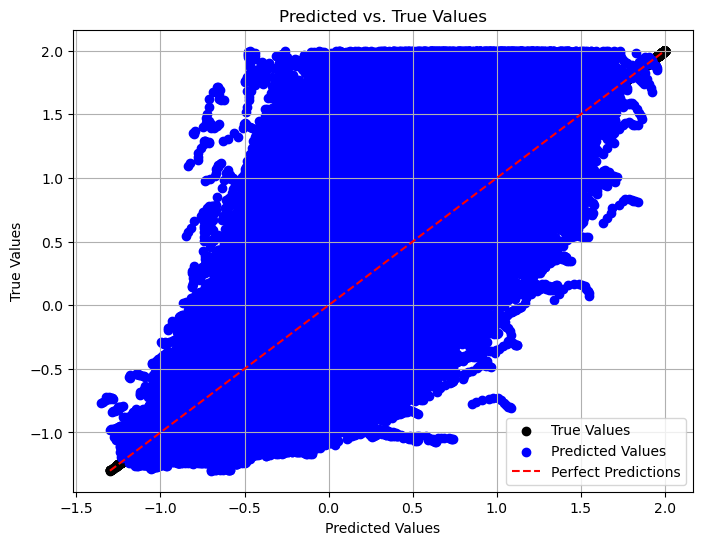

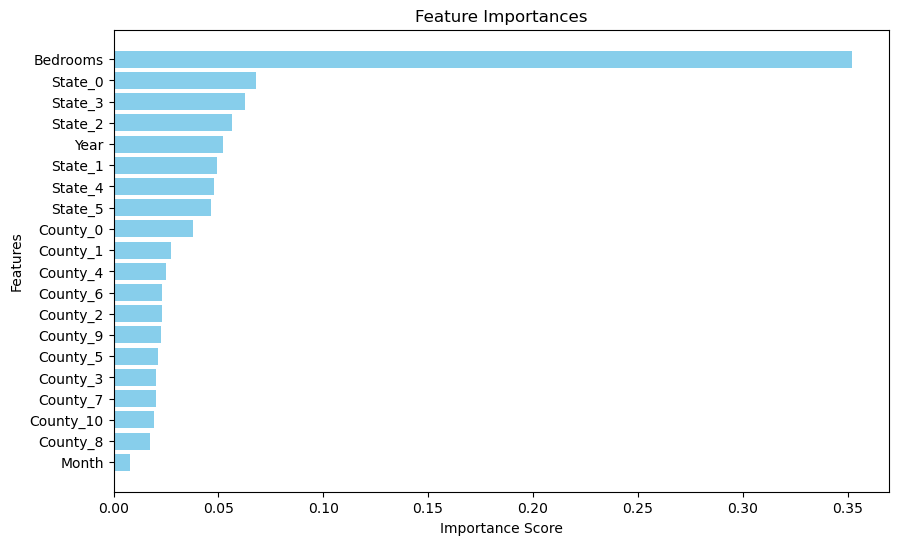

--- Metric Results Across Folds: ----
{'r2_score': [0.6448137876693982, 0.6496206200166268, 0.6539729380259889, 0.6556589436262701, 0.6617416411607207, 0.6605981633808369, 0.5928193760918886, 0.5752583922181749], 'mean_squared_error': [0.15439456487928716, 0.1590594581960953, 0.1636624990711407, 0.1678713120176125, 0.1672896645697477, 0.17218972496795354, 0.22314740065838717, 0.24017550098914922]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 0.08111587 -0.3171691   0.41457003 ...  0.79244775  1.291822
 -0.3040831 ]
Average MSE score: 0.18097376566867168
Average r2 score: 0.6368104827737382
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 500, learning_rate = 0.1
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 500, learning_rate = 0.2
[0]	validation_0-rmse:0.62139
[100]	validation_0-rmse:0.42072
[200]	validation_0-rmse:0.39351
[300]	validation_0-rmse:0.38093
[400]	validat

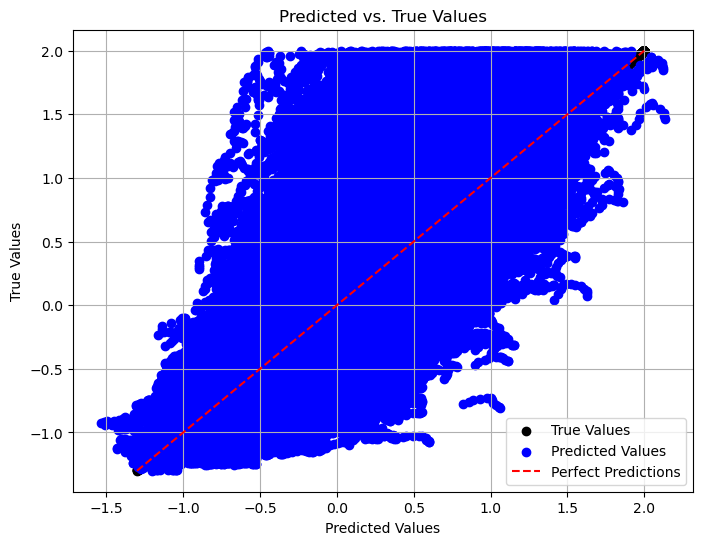

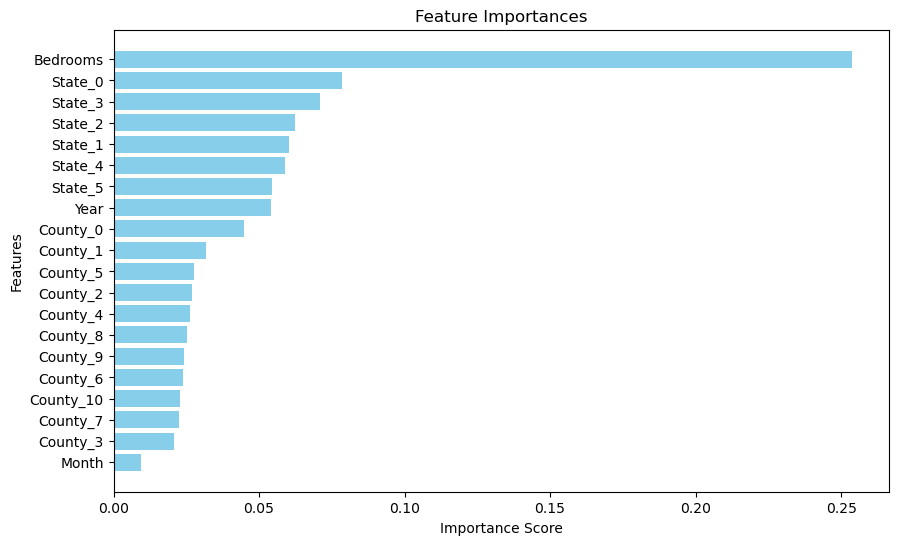

--- Metric Results Across Folds: ----
{'r2_score': [0.6838470148247047, 0.6836851024571389, 0.6954549036313288, 0.7015622569425428, 0.709840392435497, 0.7080878159150866, 0.6352951090328336, 0.6291344700840966], 'mean_squared_error': [0.13742735750112317, 0.14359542569231218, 0.1440425244985654, 0.14549277396725954, 0.14350185931168388, 0.14809666085801568, 0.19986940352321234, 0.20971059301755993]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 0.02230283 -0.44861323  0.6551007  ...  0.9344787   1.3552468
 -0.3781796 ]
Average MSE score: 0.15896707479621652
Average r2 score: 0.6808633831654036
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 500, learning_rate = 0.2
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 500, learning_rate = 0.3
[0]	validation_0-rmse:0.60479
[100]	validation_0-rmse:0.40087
[200]	validation_0-rmse:0.38067
[300]	validation_0-rmse:0.37244
[400]	vali

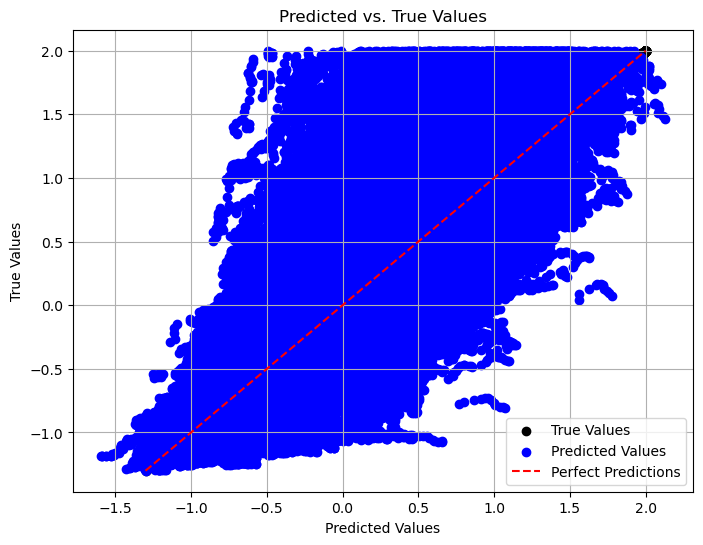

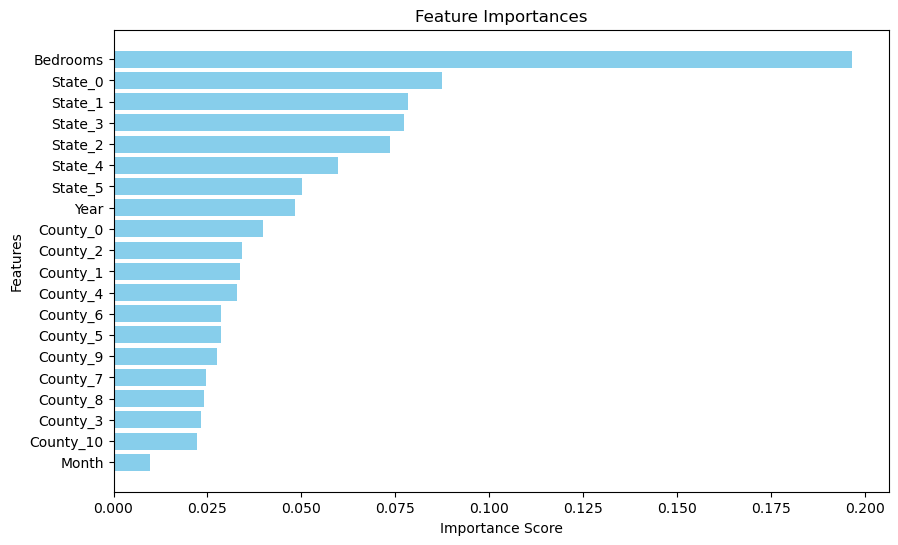

--- Metric Results Across Folds: ----
{'r2_score': [0.694280462622587, 0.6937768546007059, 0.710334239782267, 0.7167465213822062, 0.7263106325869066, 0.7228642842151922, 0.6522026019950777, 0.6484372998819479], 'mean_squared_error': [0.13289208113897252, 0.1390141383223727, 0.1370049554567399, 0.13809022249590053, 0.1353563076104126, 0.14060007204182773, 0.19060358171184302, 0.19879556436892185]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [-0.0278306  -0.43653426  0.70859885 ...  1.0571085   1.3866911
 -0.41520935]
Average MSE score: 0.15154461539337383
Average r2 score: 0.6956191121333613
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 500, learning_rate = 0.3
 --- END TUNING SESSION ---

--- START TUNING SESSION ---
n_estimator = 500, learning_rate = 0.4
[0]	validation_0-rmse:0.58994
[100]	validation_0-rmse:0.39121
[200]	validation_0-rmse:0.37493
[300]	validation_0-rmse:0.36788
[400]	validat

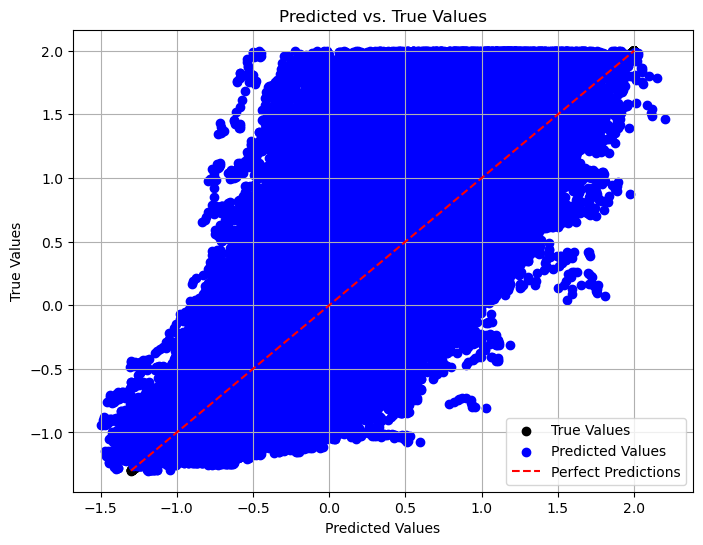

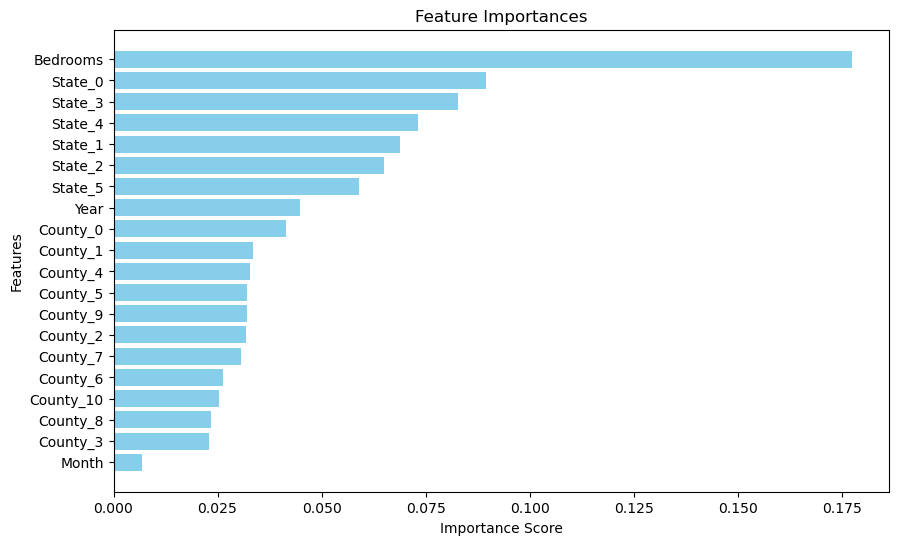

--- Metric Results Across Folds: ----
{'r2_score': [0.6995752962699331, 0.6996944331854131, 0.7161431021051372, 0.7227510983569381, 0.7321957151969333, 0.733225038462149, 0.6597510875192356, 0.6560817557510019], 'mean_squared_error': [0.1305904897237931, 0.13632777349245315, 0.13425750293352504, 0.13516290321113605, 0.13244577053107795, 0.13534372033196396, 0.18646678142047304, 0.1944729103493924]}
True values: [ 0.0936155  -0.26324223  1.4158823  ...  1.44225997  1.54415838
 -0.61390117]
Predictions: [ 0.01934308 -0.48327985  0.6622896  ...  1.0393901   1.4096903
 -0.36862364]
Average MSE score: 0.14813348149922684
Average r2 score: 0.7024271908558426
Average baseline MSE: 0.4955660361513299
Average baseline r2: 0.0
n_estimator = 500, learning_rate = 0.4
 --- END TUNING SESSION ---

 --- SUMMARY EVALUATION ACROSS ALL FOLDS --- 
Average MSE: 0.25633573576443425 and Average r2: 0.4855290666618102 with n_estimators = 100, learning rate = 0.1
Average MSE: 0.21365464191394015 and Average r

In [28]:
import math

n_estimators = [100, 300, 500]
learning_rate = [0.1, 0.2, 0.3, 0.4]

validation_years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
metrics = [r2_score, mean_squared_error]

saved_results = []
best_settings = [[math.inf, 0, 0], [- math.inf, 0, 0]] # ([MSE, n_estimators, learning rate], [r2, n_estimators, learning rate])
for i_estimator in n_estimators:
    for rate in learning_rate:
        print("\n--- START TUNING SESSION ---")
        print(f"n_estimator = {i_estimator}, learning_rate = {rate}")
        model = XGBRegressor(early_stopping_rounds = 50, 
                             eval_metric = ['rmse'], 
                             n_estimators = i_estimator, 
                             learning_rate = rate)
        results = rolling_cross_validation(validation_years, model, X.values, y.values, metrics = metrics)
        
        # Keep best setting of hyperparameters (lowest average MSE and lowest r-squared score)
        mse, r2 = results
        if mse < best_settings[0][0]:
            best_settings[0][0] = mse
            best_settings[0][1] = i_estimator
            best_settings[0][2] = rate
        if r2 > best_settings[1][0]:
            best_settings[1][0] = r2
            best_settings[1][1] = i_estimator
            best_settings[1][2] = rate

        saved_results.append([*results, i_estimator, rate]) # * = unpack elements of results into list.
        print(f"n_estimator = {i_estimator}, learning_rate = {rate}")
        print(" --- END TUNING SESSION ---")

print("\n --- SUMMARY EVALUATION ACROSS ALL FOLDS --- ")
for MSE, r2, estimator, rate in saved_results:
    print(f"Average MSE: {MSE} and Average r2: {r2} with n_estimators = {estimator}, learning rate = {rate}") 

print("\n --- BEST PARAMETERS --- ")
print(f"Best average MSE: {best_settings[0][0]} with n_estimators = {best_settings[0][1]} and learning rate = {best_settings[0][2]}")
print(f"Best average r2: {best_settings[1][0]} with n_estimators = {best_settings[1][1]} and learning rate = {best_settings[1][2]}")

### Test trained model performance with heldout set

In [98]:
def plot_residuals_hist(true, y_pred):
    residuals = true - y_pred

    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=20, edgecolor = "white")
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

In [99]:
def plot_residuals(true, y_pred):
    residuals = true - y_pred

    # Plot residuals against predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True)
    plt.show()

### test_model function

In [100]:
# adapted from: https://kili-technology.com/data-labeling/machine-learning/cross-validation-in-machine-learning#rolling-cross-validation-python-code-example

# Import necessary libraries
from xgboost import XGBRegressor 
import numpy as np
from sklearn.metrics import mean_squared_error
from typing import List, Dict, Union, Callable
from typing import Any

def test_model(
        test_years,
        model: Any,
        X: np.ndarray,
        y: np.ndarray,
        metrics: Union[List[Callable], Callable] = mean_squared_error,
        int_verbose: int = 100
    ):
    """
    Perform rolling cross-validation on time-series data.

    Parameters:
    - test_years: years in held-out set to be used to assess model's performance after training.
    - model: The machine learning model to use (should have fit and predict methods)
    - X: The feature matrix
    - y: The target vector
    - metrics: A metric or list of metrics to evaluate model's predictions vs. true values.
    - int_verbose: how often to print debugging information
    """
    predicted_prices = np.empty(0)
    true_prices = np.empty(0)
    baseline_mse = []
    baseline_r2 = []
    
    # If only a single metric is provided, put it in a list (otherwise, metrics is a Callable function, not a list -- causes issues)
    if callable(metrics):
        metrics = [metrics]

    # Initialize dictionary to hold metric results -- key is metric name and value an empty list.
    metric_results = {metric.__name__: [] for metric in metrics}

    # test_index contains all the indices of the test data.
    for year in test_years:
        test_index = finalData[finalData['Year'] == year].index
        
        # Get X (feature matrix) and y (target vector) rows for given test year
        X_test, y_test = X[test_index], y[test_index]

        # Make predictions on features of test subset.
        # verified - predict():  If the model is trained with early stopping, then best_iteration is used automatically.
        y_pred = model.predict(X_test)

        # Calculate and store metric(s) -- compare predictions with true output for housing price
        for metric in metrics:
            metric_value = metric(y_test, y_pred)
            metric_results[metric.__name__].append(metric_value)

        # append predicted rates and true rates 
        predicted_prices = np.concatenate((predicted_prices, y_pred))
        true_prices = np.concatenate((true_prices, y_test))

        # print current MSE and R-squared
        print(f"\nTest Year = {year}")
        print(f"MSE = {metric_results['mean_squared_error'][-1]}")
        print(f"R2 = {metric_results['r2_score'][-1]}")
        b_mse, b_r2 = baseline(y_test)
        baseline_mse.append(b_mse)
        baseline_r2.append(b_r2)
        

    # Make plots to visualize performance
    plot_predicted_vs_true(y_test, y_pred)
    plot_residuals_hist(y_test, y_pred)
    plot_residuals(y_test, y_pred)

    print(f"--- Metric Results Across Years {test_years}: ----")
    print(metric_results)

    print(f"True values: {y_test}")
    print(f"Predictions: {y_pred}")

    # print mean MSE score of folds from cross validation
    avg_MSE_score = np.mean(metric_results['mean_squared_error'])
    print(f"Average MSE score: {avg_MSE_score}")

    # print mean r-squared score of folds from cross validation
    avg_rsquared_score = np.mean(metric_results['r2_score'])
    print(f"Average r2 score: {avg_rsquared_score}")

    # print average baseline scores
    baseline_mse = np.array(baseline_mse)
    baseline_r2 = np.array(baseline_r2)
    
    avg_baseline_mse = np.mean(baseline_mse)
    print(f"Average baseline MSE: {avg_baseline_mse}")

    avg_baseline_r2 = np.mean(baseline_r2)
    print(f"Average baseline r2: {avg_baseline_r2}")
    
    return (true_prices, predicted_prices)

### Test on 2017

In [293]:
import joblib

In [294]:
X_array = X.values

final_train_index = finalData[finalData['Year'] <= 2016].index
final_train_X = X_array[final_train_index]
final_train_X

array([[   0,    0,    0, ...,    1, 2000,    1],
       [   0,    0,    0, ...,    3, 2000,    1],
       [   0,    0,    1, ...,    3, 2000,    1],
       ...,
       [   1,    0,    0, ...,    3, 2016,   12],
       [   0,    0,    1, ...,    3, 2016,   12],
       [   0,    0,    0, ...,    3, 2016,   12]])

In [295]:
y_array = y.values

final_test_index = finalData[finalData['Year'] <= 2016].index
final_test_y = y_array[final_test_index]
final_test_y

array([-1.88286247, -0.93825945, -2.37911378, ..., -2.88566157,
       -2.92494837, -2.38431578])

In [296]:
# Train model with best hyperparameters on entire training dataset (includes training and validation set) 
trained_model = XGBRegressor(eval_metric = ['rmse'], n_estimators = 500, learning_rate = 0.4)
trained_model.fit(final_train_X, final_test_y, verbose = 100)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'], feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Test Year = 2017
MSE = 0.09930128492844437
R2 = 0.7336853402125432
Baseline MSE: 0.3728720191659586
Baseline R2: 0.0


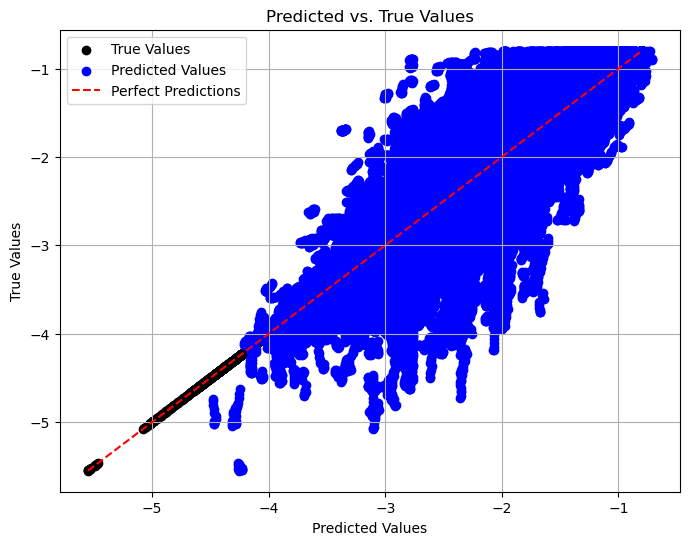

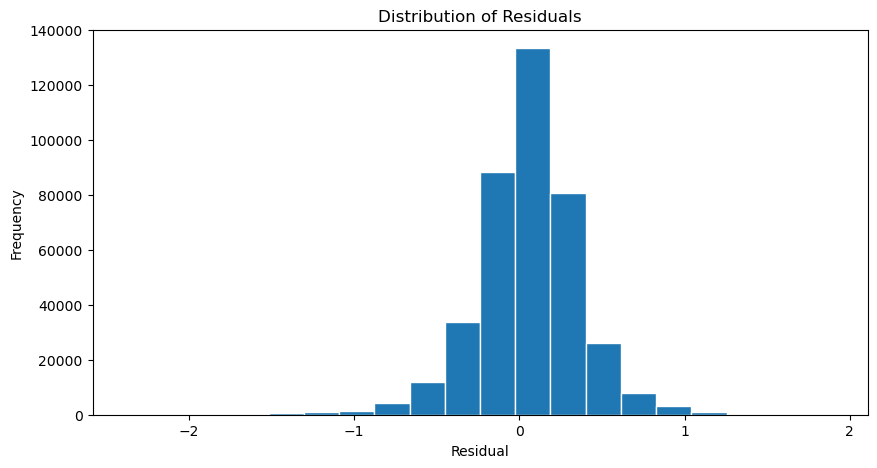

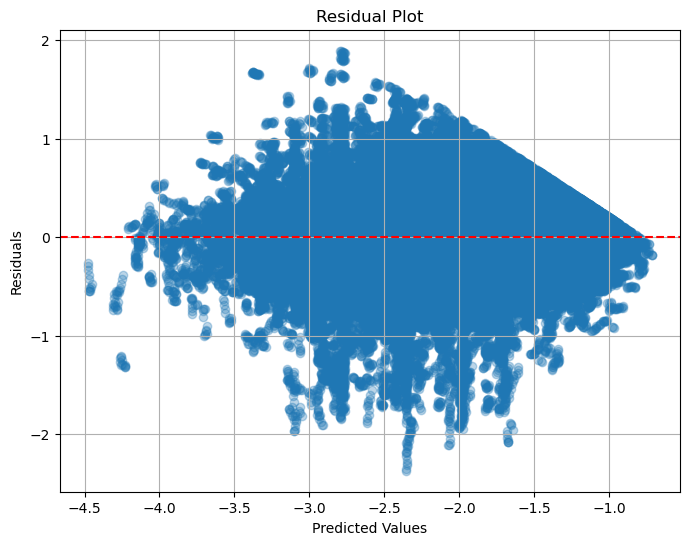

--- Metric Results Across Years [2017]: ----
{'r2_score': [0.7336853402125432], 'mean_squared_error': [0.09930128492844437]}
True values: [-1.01521674 -1.63578805 -1.81066186 ... -1.59980681 -1.66835443
 -2.92831292]
Predictions: [-1.1339201 -1.8304915 -1.6105086 ... -2.171808  -1.7871687 -2.4683359]
Average MSE score: 0.09930128492844437
Average r2 score: 0.7336853402125432
Average baseline MSE: 0.3728720191659586
Average baseline r2: 0.0


In [297]:
metrics = [r2_score, mean_squared_error]
test_years = [2017]
true_prices, predicted_prices = test_model(test_years, trained_model, X.values, y.values, metrics)

### Test on 2018

In [298]:
X_array = X.values

final_train_index = finalData[finalData['Year'] <= 2017].index
final_train_X = X_array[final_train_index]
final_train_X

array([[   0,    0,    0, ...,    1, 2000,    1],
       [   0,    0,    0, ...,    3, 2000,    1],
       [   0,    0,    1, ...,    3, 2000,    1],
       ...,
       [   0,    1,    1, ...,    3, 2017,   12],
       [   1,    0,    1, ...,    3, 2017,   12],
       [   0,    0,    1, ...,    3, 2017,   12]])

In [299]:
y_array = y.values

final_test_index = finalData[finalData['Year'] <= 2017].index
final_test_y = y_array[final_test_index]
final_test_y

array([-1.88286247, -0.93825945, -2.37911378, ..., -1.59980681,
       -1.66835443, -2.92831292])

In [300]:
# Train model with best hyperparameters on entire training dataset (includes training and validation set) 
trained_model = XGBRegressor(eval_metric = ['rmse'], n_estimators = 500, learning_rate = 0.4)
trained_model.fit(final_train_X, final_test_y, verbose = 100)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'], feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Test Year = 2018
MSE = 0.09241316981147833
R2 = 0.7388734835236023
Baseline MSE: 0.35390189804730626
Baseline R2: 0.0


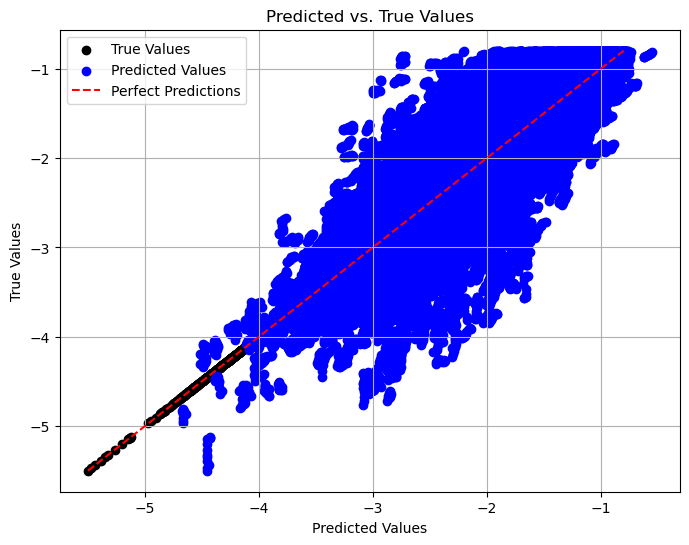

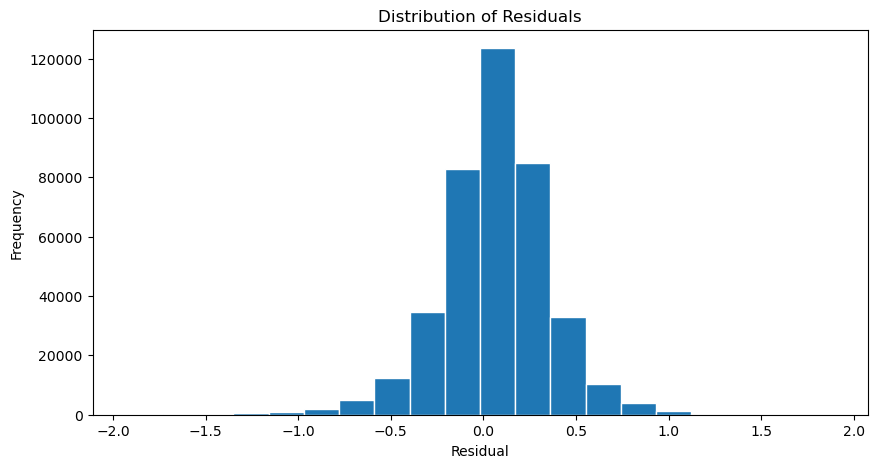

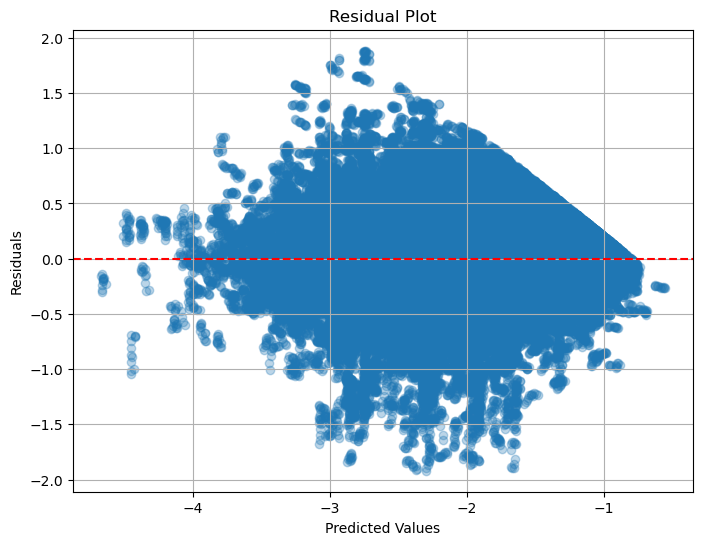

--- Metric Results Across Years [2018]: ----
{'r2_score': [0.7388734835236023], 'mean_squared_error': [0.09241316981147833]}
True values: [-1.62744735 -1.10777363 -1.61249319 ... -0.92047064 -1.89402931
 -1.6055874 ]
Predictions: [-1.6323428 -1.1492647 -1.4544532 ... -0.9874669 -2.1927152 -1.5986725]
Average MSE score: 0.09241316981147833
Average r2 score: 0.7388734835236023
Average baseline MSE: 0.35390189804730626
Average baseline r2: 0.0


In [301]:
metrics = [r2_score, mean_squared_error]
test_years = [2018]
true_prices, predicted_prices = test_model(test_years, trained_model, X.values, y.values, metrics)

### Test on 2019

In [302]:
X_array = X.values

final_train_index = finalData[finalData['Year'] <= 2018].index
final_train_X = X_array[final_train_index]
final_train_X

array([[   0,    0,    0, ...,    1, 2000,    1],
       [   0,    0,    0, ...,    3, 2000,    1],
       [   0,    0,    1, ...,    3, 2000,    1],
       ...,
       [   0,    0,    1, ...,    3, 2018,   12],
       [   0,    0,    0, ...,    3, 2018,   12],
       [   1,    0,    0, ...,    3, 2018,   12]])

In [303]:
y_array = y.values

final_test_index = finalData[finalData['Year'] <= 2018].index
final_test_y = y_array[final_test_index]
final_test_y

array([-1.88286247, -0.93825945, -2.37911378, ..., -0.92047064,
       -1.89402931, -1.6055874 ])

In [304]:
# Train model with best hyperparameters on entire training dataset (includes training and validation set) 
trained_model = XGBRegressor(eval_metric = ['rmse'], n_estimators = 500, learning_rate = 0.4)
trained_model.fit(final_train_X, final_test_y, verbose = 100)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'], feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Test Year = 2019
MSE = 0.08873576092782197
R2 = 0.7422650141800398
Baseline MSE: 0.3442907087119636
Baseline R2: 0.0


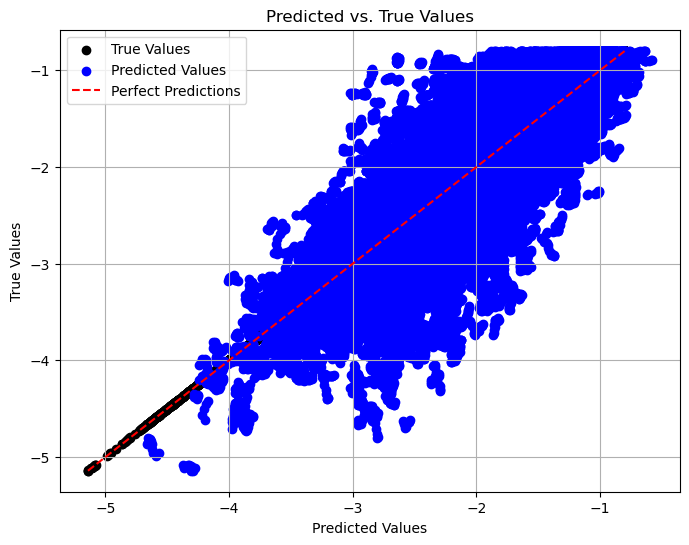

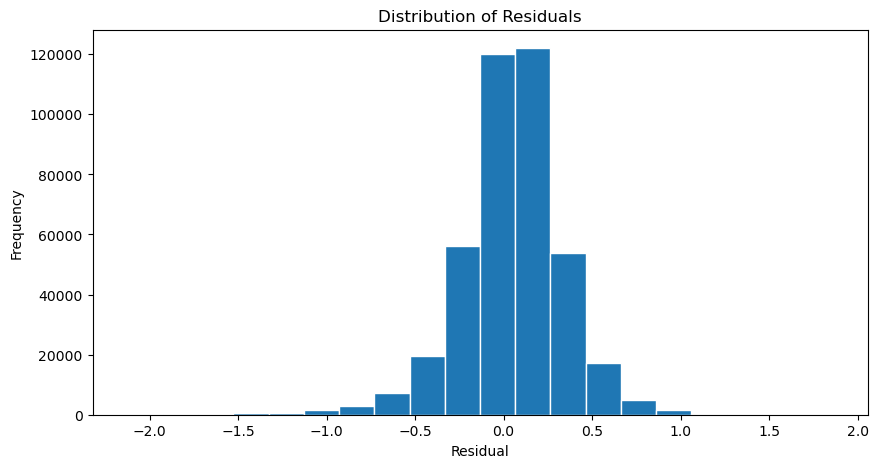

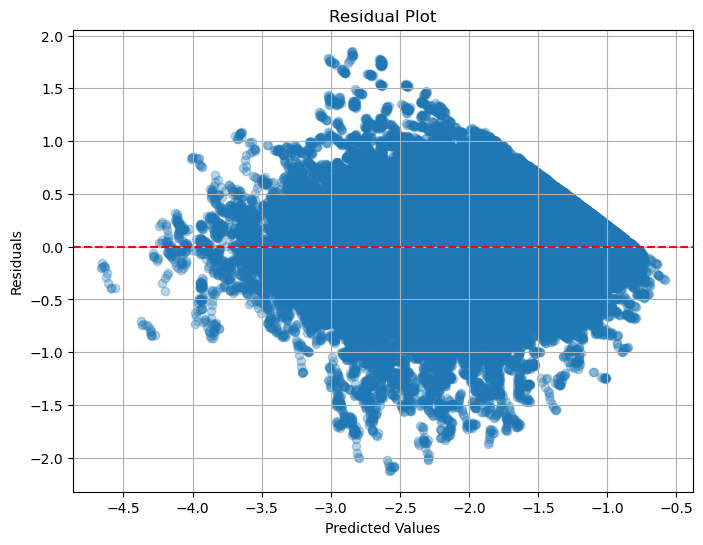

--- Metric Results Across Years [2019]: ----
{'r2_score': [0.7422650141800398], 'mean_squared_error': [0.08873576092782197]}
True values: [-2.21673774 -1.36930117 -1.31379779 ... -1.48383151 -2.44772314
 -2.41450026]
Predictions: [-2.020761  -1.904018  -1.9769505 ... -1.8259194 -2.1885533 -2.5412328]
Average MSE score: 0.08873576092782197
Average r2 score: 0.7422650141800398
Average baseline MSE: 0.3442907087119636
Average baseline r2: 0.0


In [305]:
metrics = [r2_score, mean_squared_error]
test_years = [2019]
true_prices, predicted_prices = test_model(test_years, trained_model, X.values, y.values, metrics)

### Test on 2020

In [306]:
X_array = X.values

final_train_index = finalData[finalData['Year'] <= 2019].index
final_train_X = X_array[final_train_index]
final_train_X

array([[   0,    0,    0, ...,    1, 2000,    1],
       [   0,    0,    0, ...,    3, 2000,    1],
       [   0,    0,    1, ...,    3, 2000,    1],
       ...,
       [   1,    0,    1, ...,    3, 2019,   12],
       [   0,    0,    0, ...,    3, 2019,   12],
       [   0,    1,    0, ...,    3, 2019,   12]])

In [307]:
y_array = y.values

final_test_index = finalData[finalData['Year'] <= 2019].index
final_test_y = y_array[final_test_index]
final_test_y

array([-1.88286247, -0.93825945, -2.37911378, ..., -1.48383151,
       -2.44772314, -2.41450026])

In [308]:
# Train model with best hyperparameters on entire training dataset (includes training and validation set) 
trained_model = XGBRegressor(eval_metric = ['rmse'], n_estimators = 500, learning_rate = 0.4)
trained_model.fit(final_train_X, final_test_y, verbose = 100)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'], feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Test Year = 2020
MSE = 0.08357138956622524
R2 = 0.742383431235772
Baseline MSE: 0.3244022306760487
Baseline R2: 0.0


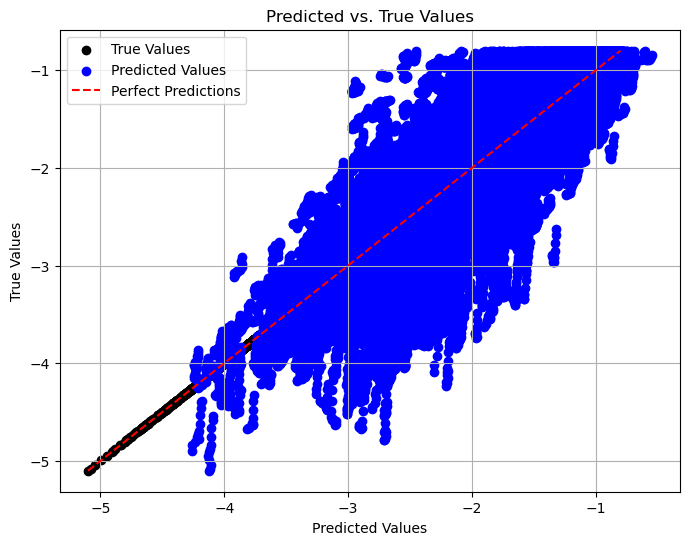

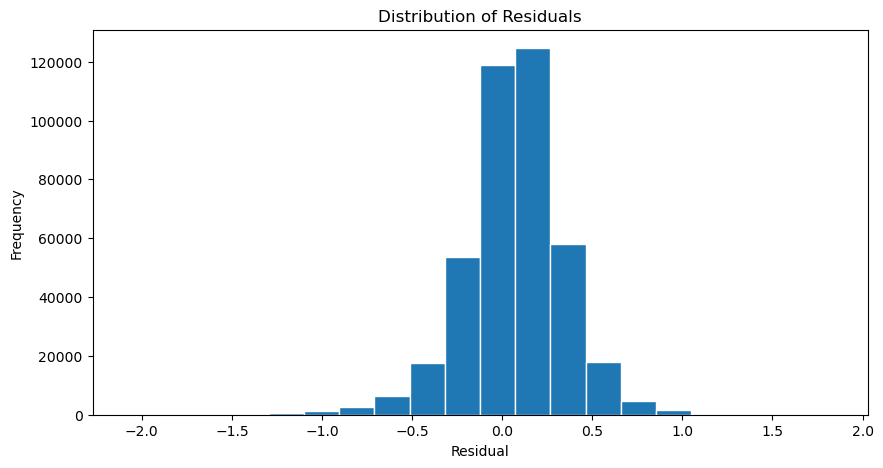

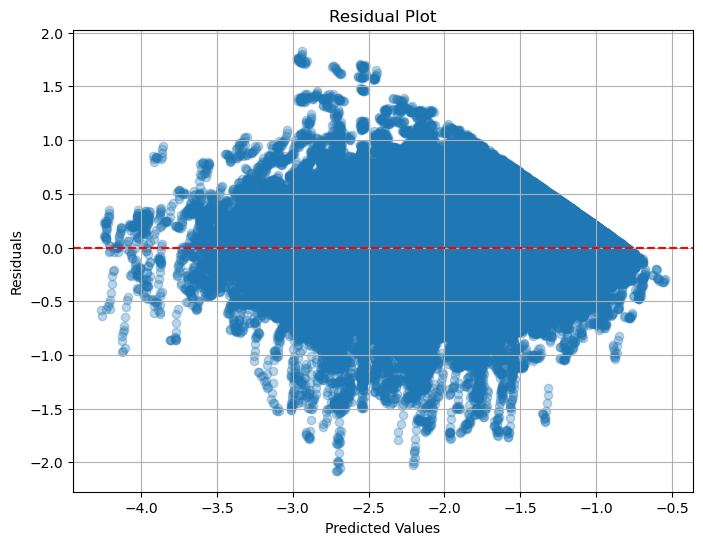

--- Metric Results Across Years [2020]: ----
{'r2_score': [0.742383431235772], 'mean_squared_error': [0.08357138956622524]}
True values: [-1.38139873 -0.95473047 -1.29700664 ... -1.75999183 -2.05001552
 -0.93846294]
Predictions: [-1.1291451 -1.0894663 -1.546686  ... -1.6998978 -2.160523  -1.4658055]
Average MSE score: 0.08357138956622524
Average r2 score: 0.742383431235772
Average baseline MSE: 0.3244022306760487
Average baseline r2: 0.0


In [309]:
metrics = [r2_score, mean_squared_error]
test_years = [2020]
true_prices, predicted_prices = test_model(test_years, trained_model, X.values, y.values, metrics)

### Test on years 2018-2021

In [107]:
X_array = X.values

final_train_index = finalData[finalData['Year'] <= 2017].index
final_train_X = X_array[final_train_index]
final_train_X

array([[   0,    0,    0, ...,    1, 2000,    1],
       [   0,    0,    0, ...,    3, 2000,    1],
       [   0,    0,    1, ...,    3, 2000,    1],
       ...,
       [   0,    1,    1, ...,    3, 2017,   12],
       [   1,    0,    1, ...,    3, 2017,   12],
       [   0,    0,    1, ...,    3, 2017,   12]])

In [108]:
y_array = y.values

final_test_index = finalData[finalData['Year'] <= 2017].index
final_test_y = y_array[final_test_index]
final_test_y

array([-1.88286247, -0.93825945, -2.37911378, ..., -1.59980681,
       -1.66835443, -2.92831292])

In [109]:
# Train model with best hyperparameters on entire training dataset (includes training and validation set) 
trained_model = XGBRegressor(eval_metric = ['rmse'], n_estimators = 500, learning_rate = 0.4)
trained_model.fit(final_train_X, final_test_y, verbose = 100)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'], feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Test Year = 2018
MSE = 0.09241316981147833
R2 = 0.7388734835236023
Baseline MSE: 0.35390189804730626
Baseline R2: 0.0

Test Year = 2019
MSE = 0.10339114363673989
R2 = 0.6996981300380146
Baseline MSE: 0.3442907087119636
Baseline R2: 0.0

Test Year = 2020
MSE = 0.12105363835179282
R2 = 0.6268409187584219
Baseline MSE: 0.3244022306760487
Baseline R2: 0.0

Test Year = 2021
MSE = 0.19126423501318707
R2 = 0.3399994874952832
Baseline MSE: 0.2897940704429683
Baseline R2: 0.0


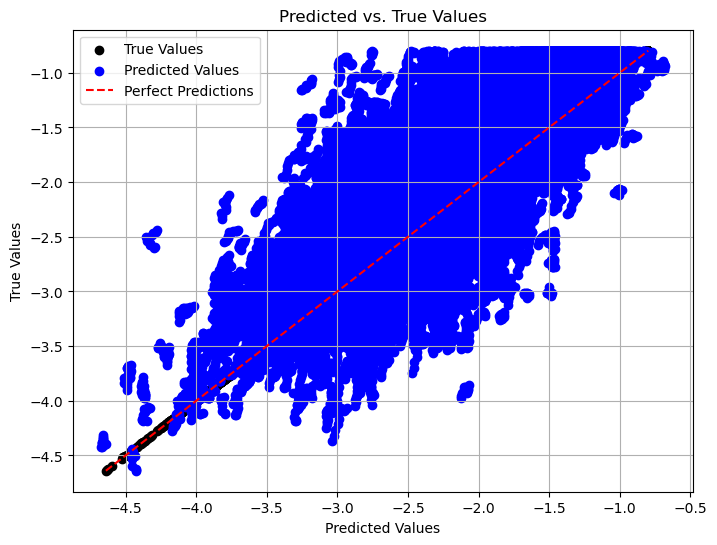

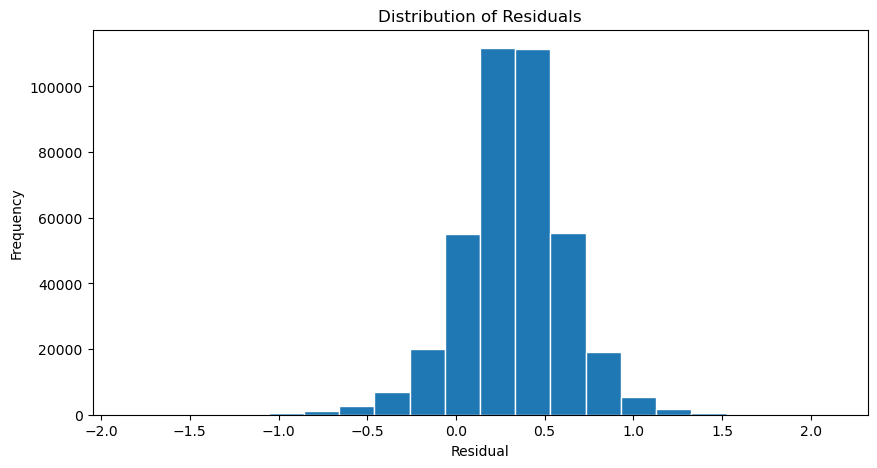

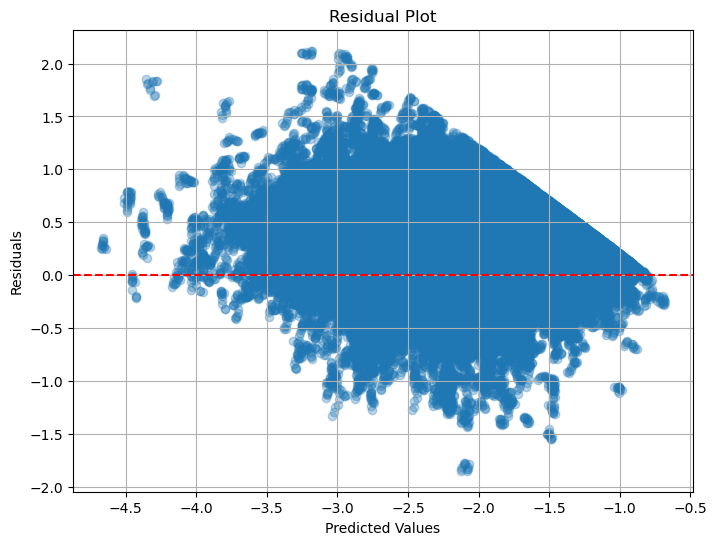

--- Metric Results Across Years [2018, 2019, 2020, 2021]: ----
{'r2_score': [0.7388734835236023, 0.6996981300380146, 0.6268409187584219, 0.3399994874952832], 'mean_squared_error': [0.09241316981147833, 0.10339114363673989, 0.12105363835179282, 0.19126423501318707]}
True values: [-2.75412326 -3.30249569 -2.45708351 ... -2.11604855 -1.13836804
 -2.49559152]
Predictions: [-2.6314893 -2.9651017 -2.6648955 ... -2.2560878 -1.3645829 -2.3291187]
Average MSE score: 0.12703054670329952
Average r2 score: 0.6013530049538305
Average baseline MSE: 0.3280972269695717
Average baseline r2: 0.0


In [110]:
metrics = [r2_score, mean_squared_error]
test_years = [2018, 2019, 2020, 2021]
true_prices, predicted_prices = test_model(test_years, trained_model, X.values, y.values, metrics)

### Test on 2021

In [310]:
X_array = X.values

final_train_index = finalData[finalData['Year'] <= 2020].index
final_train_X = X_array[final_train_index]
final_train_X

array([[   0,    0,    0, ...,    1, 2000,    1],
       [   0,    0,    0, ...,    3, 2000,    1],
       [   0,    0,    1, ...,    3, 2000,    1],
       ...,
       [   0,    0,    0, ...,    3, 2020,   12],
       [   0,    0,    1, ...,    3, 2020,   12],
       [   1,    0,    0, ...,    4, 2020,   12]])

In [311]:
y_array = y.values

final_test_index = finalData[finalData['Year'] <= 2020].index
final_test_y = y_array[final_test_index]
final_test_y

array([-1.88286247, -0.93825945, -2.37911378, ..., -1.75999183,
       -2.05001552, -0.93846294])

In [312]:
# Train model with best hyperparameters on entire training dataset (includes training and validation set) 
trained_model = XGBRegressor(eval_metric = ['rmse'], n_estimators = 500, learning_rate = 0.4)
trained_model.fit(final_train_X, final_test_y, verbose = 100)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'], feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Test Year = 2021
MSE = 0.09328796016294419
R2 = 0.6780887889791957
Baseline MSE: 0.2897940704429683
Baseline R2: 0.0


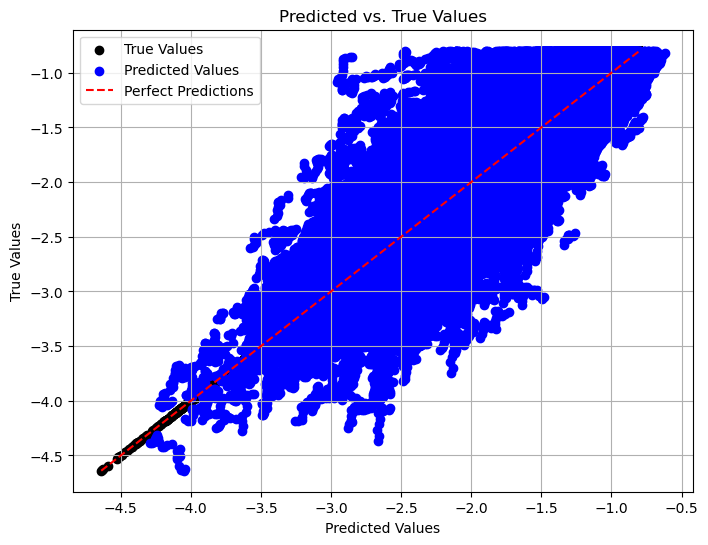

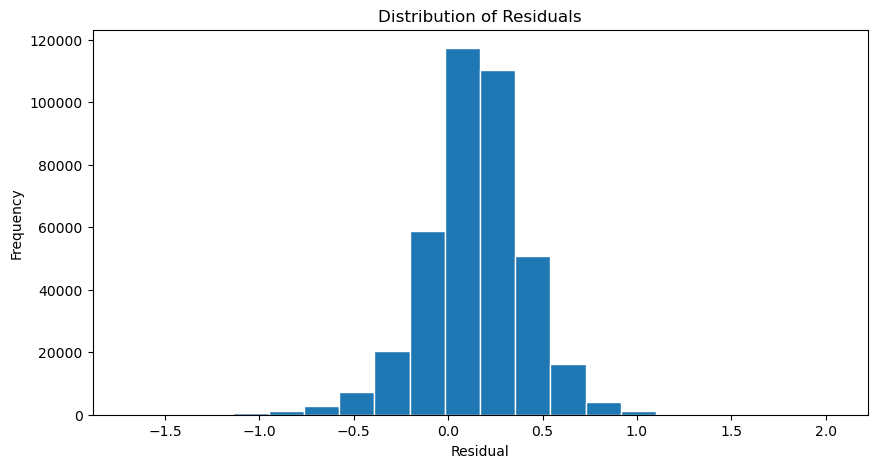

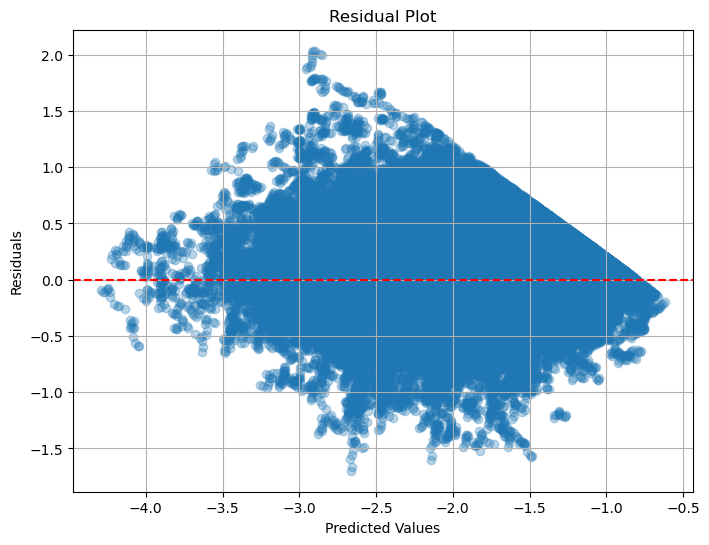

--- Metric Results Across Years [2021]: ----
{'r2_score': [0.6780887889791957], 'mean_squared_error': [0.09328796016294419]}
True values: [-2.75412326 -3.30249569 -2.45708351 ... -2.11604855 -1.13836804
 -2.49559152]
Predictions: [-2.5155709 -2.6956046 -2.4766967 ... -1.9471759 -1.0391688 -2.0916734]
Average MSE score: 0.09328796016294419
Average r2 score: 0.6780887889791957
Average baseline MSE: 0.2897940704429683
Average baseline r2: 0.0


In [313]:
metrics = [r2_score, mean_squared_error]
test_years = [2021]
true_prices, predicted_prices = test_model(test_years, trained_model, X.values, y.values, metrics)

### Test on 2022

In [314]:
X_array = X.values

final_train_index = finalData[finalData['Year'] <= 2021].index
final_train_X = X_array[final_train_index]
final_train_X

array([[   0,    0,    0, ...,    1, 2000,    1],
       [   0,    0,    0, ...,    3, 2000,    1],
       [   0,    0,    1, ...,    3, 2000,    1],
       ...,
       [   0,    0,    0, ...,    2, 2021,   12],
       [   0,    0,    1, ...,    2, 2021,   12],
       [   0,    0,    1, ...,    2, 2021,   12]])

In [315]:
y_array = y.values

final_test_index = finalData[finalData['Year'] <= 2021].index
final_test_y = y_array[final_test_index]
final_test_y

array([-1.88286247, -0.93825945, -2.37911378, ..., -2.11604855,
       -1.13836804, -2.49559152])

In [316]:
# Train model with best hyperparameters on entire training dataset (includes training and validation set) 
trained_model = XGBRegressor(eval_metric = ['rmse'], n_estimators = 500, learning_rate = 0.4)
trained_model.fit(final_train_X, final_test_y, verbose = 100)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'], feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Test Year = 2022
MSE = 0.08554026927882218
R2 = 0.6795027368084213
Baseline MSE: 0.266898595098736
Baseline R2: 0.0


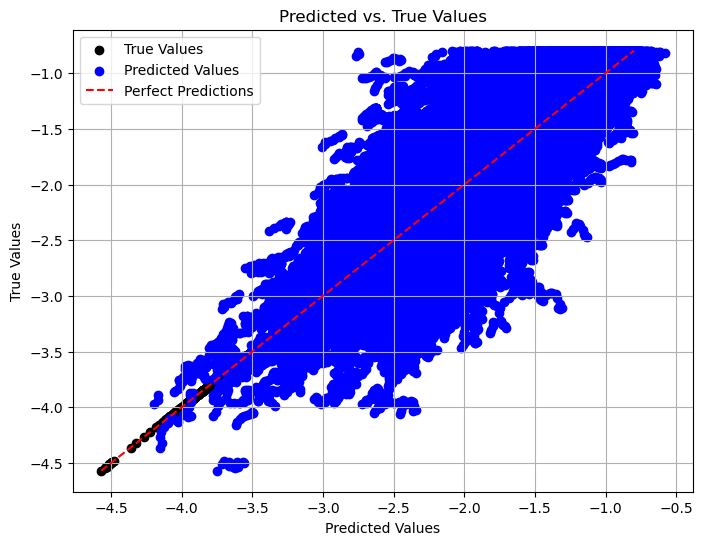

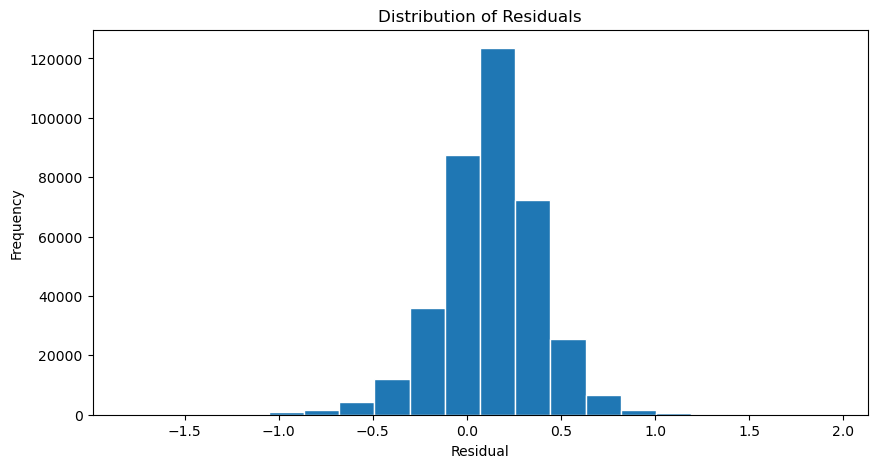

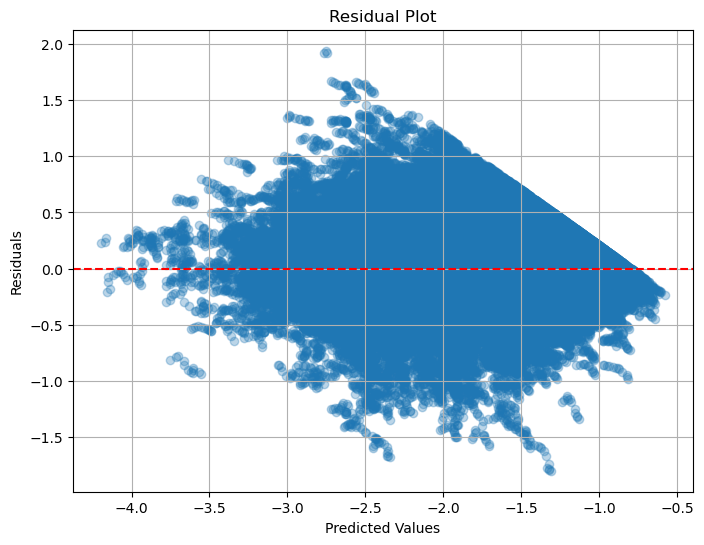

--- Metric Results Across Years [2022]: ----
{'r2_score': [0.6795027368084213], 'mean_squared_error': [0.08554026927882218]}
True values: [-2.4078698  -1.44986662 -1.41982028 ... -1.40073402 -1.69928196
 -2.18101816]
Predictions: [-2.239746  -1.6089945 -1.8337662 ... -1.4138876 -1.91795   -2.0599027]
Average MSE score: 0.08554026927882218
Average r2 score: 0.6795027368084213
Average baseline MSE: 0.266898595098736
Average baseline r2: 0.0


In [317]:
metrics = [r2_score, mean_squared_error]
test_years = [2022]
true_prices, predicted_prices = test_model(test_years, trained_model, X.values, y.values, metrics)

## Train model on entire housing dataset (up to 2021)

In [51]:
X_array = X.values

final_train_index = finalData[finalData['Year'] <= 2021].index
final_train_X = X_array[final_train_index]
final_train_X 

array([[   0,    0,    0, ...,    1, 2000,    1],
       [   0,    0,    0, ...,    3, 2000,    1],
       [   0,    0,    1, ...,    3, 2000,    1],
       ...,
       [   0,    1,    1, ...,    2, 2021,   12],
       [   0,    1,    0, ...,    2, 2021,   12],
       [   0,    0,    1, ...,    2, 2021,   12]])

In [52]:
y_array = y.values

final_test_index = finalData[finalData['Year'] <= 2021].index
final_test_y = y_array[final_test_index]
final_test_y

array([-0.35125833,  1.24997209, -0.74977636, ..., -1.00916275,
       -1.11084343,  0.57064838])

In [53]:
# Train model with best hyperparameters on entire training dataset (includes training and validation set) 
trained_model = XGBRegressor(eval_metric = ['rmse'], n_estimators = 1000, learning_rate = 0.5)
trained_model.fit(final_train_X, final_test_y, verbose = 100)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'], feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Save trained model 

In [54]:
# # save trained housing model
# trained_model.save_model('xgb_housing.model_upto2021') 

/home/lg6248/.conda/envs/ml-env/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [03:43:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705649946806/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [127]:
import xgboost as xgb
housing_model = xgb.XGBRegressor()
housing_model.load_model('/scratch/network/lg6248/housing-model/xgb_housing.model_upto2021') 